<div class="alert alert-block alert-success">
<b>COMENTARIO GENERAL CUARTA REVISIÓN</b> <a class="tocSkip"></a>

Sara, felicidades! Tu trabajo está aprobado. No tengo más que decir, aplicaste las correcciones impecablemente. Sigue esforzándote así! Quedó un gran trabajo :)
    
Sólo por favor revisa la sección `2.¿Cuántos pedidos hacen durante un período de tiempo dado?`, porque ahí tuve yo un error y te hago comentarios IMPORTANTES: **2 amarillos y 1 rojo**, para que por favor corrijas finalmente tu trabajo :) Ya no tienes que volverme a entregar tu proyecto, confío en que aplicarás los cambios.
    
Que estés muy bien :)

</div>

# Y.Afisha

# Contents
* [1.-Introducción y objetivos.](#objetivo)
* [2.-Importacion de los archivos y optimización ](#importacion)
* [3.-Creación de informes y métricas](#preparación)
* [3.1 Métricas de producto](#preparación)
* [3.2 Métricas de ventas](#preparación)
* [3.3-Métricas de marketing](#análisis)
* [4.- Conclusión General](#conclusiongeneral)

# 1. Introducción y objetivos

Dentro del mi rol como practicante del departamento analítico de Y.Afisha, mi primera tarea es ayudar a optimizar los gastos de marketing.

La información que tenemos disponible es:
* Registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018
* Archivo de volcado con todos los pedidos del período
* Estadísticas de gastos de marketing

A partir de estos datos analizaremos las siguientes métricas para producto, ventas y marketing:  
* Cómo la gente usa el producto
* Cuándo empiezan a comprar
* Cuánto dinero trae cada cliente
* Cuándo pagan.

Finalmente aconsejaremos a los expertos de marketing cuánto dinero invertir y en que plataforma.

# 2. Importación de los archivos y optimización

Procedemos a importar las librerías y a crear los dataframes por cada fuente de archivo.
Para cada dataframe se imprimirán las primeras 5 filas, veremos la información y reaizaremos optimización en el uso de la memoria de los datos.

**2.1 Importación de archivos y librerías**

In [171]:
#librerías 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [172]:
#Importación de arhivos
visitas=pd.read_csv('/datasets/visits_log_us.csv',nrows=500)
orders=pd.read_csv('/datasets/orders_log_us.csv',nrows=500)
costos=pd.read_csv('/datasets/costs_us.csv',nrows=500)

**2.2 Optimización de la carga de datos**

**DataFrame Visitas**

In [173]:
# Primeras 5 filas
visitas.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [174]:
#Informacion del dataframe visitas
visitas.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buen inicio! El read con la ruta correcta, el head, y el info! Interesante este enfoque, Sara, de revisar pocas filas y cuidar tu uso de memoria :)</div>

Podemos ver que solo al extraer 500 filas en este dataframe ocupa 113.1 KB, que se encuentra en 5 columnas. A continuación descargaremos los tipos de datos en los formatos necesarios, es decir cambiar al tipo category y para las columnas de fecha en formato de datetime.

In [175]:
visitas['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

Podemos ver que solo tenemos 2 tipos de Device como desktop y touch por lo que al ser pocas si nos conviene hacer el tipo de cambio a category.

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Buena idea cambiar de tipo a category! pero antes de hacerlo necesitas aplicar un value_counts o un nunique a la columna Device, si hay muchas categorías no es bueno cambiar al tipo category :) Éste no es el caso pero siempre es bueno revisar eso!~~

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

In [176]:
visitas=pd.read_csv('/datasets/visits_log_us.csv',nrows=500,dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    category      
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.4 KB


Ahora el dataframe es de 16.4 kilobytes en lugar de 113, se ha conseguido el objetivo de hacer más pequeño cambiando el tipo de datos.  A continuación realizaremos el mismo procedimiento para los siguientes dataframes.

**DataFrame Orders**

In [177]:
# Primeras 5 filas
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [178]:
#Informacion del dataframe orders
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


In [179]:
orders=pd.read_csv('/datasets/orders_log_us.csv',nrows=500,parse_dates=['Buy Ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   500 non-null    datetime64[ns]
 1   Revenue  500 non-null    float64       
 2   Uid      500 non-null    uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 11.8 KB


Logramos pasar de 45 KB a 11.9 KB, es una gran diferencia, en ese caso solo se logró hacerlo con el tipo de dato de fecha.

**DataFrame costos**

In [180]:
# Primeras 5 filas
costos.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [181]:
#Informacion del dataframe costos
costos.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


In [182]:
costos=pd.read_csv('/datasets/costs_us.csv',nrows=500,parse_dates=['dt'])
costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  500 non-null    int64         
 1   dt         500 non-null    datetime64[ns]
 2   costs      500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.8 KB


* Finalmente después de haber terminado esta etapa de optimización procederemos a importar toda la base de datos de los dataframes con los cambios identificados.



In [183]:
visitas=pd.read_csv('/datasets/visits_log_us.csv',dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
orders=pd.read_csv('/datasets/orders_log_us.csv',parse_dates=['Buy Ts'])
costos=pd.read_csv('/datasets/costs_us.csv',parse_dates=['dt'])

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Pero faltaron pasos muy importantes para todo proyecto!: revisar ausentes y duplicados de todos los dataframes.~~</div>

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

**2.2 Evaluación valores ausentes**

In [184]:
visitas.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [185]:
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [186]:
costos.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

* Como podemos ver no tenemos valores ausentes en ningún dataframe.


**2.3 Evaluación valores duplicados.**

In [187]:
visitas.duplicated().sum()

0

In [188]:
costos.duplicated().sum()

0

In [189]:
orders.duplicated().sum()

0

* Comprobamos que no tenemos valores duplicados en ningún dataframe. 

**2.4 Renombrar columnas**

Ahora pasaremos a renombrar los nombres de las columnas a minúsculas y los espacios reemplazarlos por guiones bajos para los dataframes: visitas y orders

In [190]:
columns= visitas.columns
visitas.set_axis(columns.str.lower(), axis='columns', inplace=True)
visitas=visitas.rename(columns={'end ts':'end_ts','start ts':'start_ts'})
visitas.head()

,device,end_ts,source id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [191]:
columns=orders.columns
orders.set_axis(columns.str.lower(), axis='columns',inplace=True)
orders=orders.rename(columns={'buy ts':'buy_ts'})
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


**2.5 Evaluación de rangos de fechas**

Procederemos a evaluar los rangos mínimos y máximos de las fechas del dataframde de orders como de los costos de marketing para ver si tenemos el mismo intervalo.

In [192]:
print('Fecha minima de orders:',orders['buy_ts'].min())
print('Fecha máxima de orders:',orders['buy_ts'].max())
print('')
print('Fecha mínima de costos:',costos['dt'].min())
print('Fecha máxima de costos:',costos['dt'].max())

Fecha minima de orders: 2017-06-01 00:10:00
Fecha máxima de orders: 2018-06-01 00:02:00

Fecha mínima de costos: 2017-06-01 00:00:00
Fecha máxima de costos: 2018-05-31 00:00:00


* Las fechas máxima de ambos dataframes no coinciden porque tenemos un día más en la de orders hasta el 1 de junio del 2018 y en la de costos hasta el 31 de mayo del 2018. 
En este caso para el dataframe de orders se dejará hasta con una fecha máxima del 31 de mayo del 2018 para que esten iguales los rangos entre ambos.

In [193]:
orders=orders.query('buy_ts < "2018-06-01"')
orders['buy_ts'].max()

Timestamp('2018-05-31 23:56:00')

Finalmente se han ejecutado todos los cambios y los dataframes se encuentran listos y limpios para continuar con el análisis.

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

* Podría ser bueno cambiar el nombre de columnas según la convención estándar (sólo minúsculas y los espacios remplazarlos por guiones bajos).

* Podrías revisar los mínimos y máximos de las columnas de fecha para ver si todo está dentro de los intervalos esperados
    
</div>

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

# 3. Creación de informes y métricas

# 3.1 Métricas de producto

Vamos a respoder y a graficar sobre las métricas del producto para las siguientes preguntas.

**1. ¿Cuántas personas lo usan cada día, semana y mes?**




Comenzamos primero creando 4 columnas que contengan el desgloce por día,mes,semana y año de la fecha de inicio de sesión del dataframe visitas.

In [194]:
#Columnas con la identificación en la fecha por día, semana y mes.
visitas['day']= visitas['start_ts'].astype("datetime64[D]")
visitas["week"] = visitas['start_ts'].astype("datetime64[W]")
visitas["month"] = visitas['start_ts'].astype("datetime64[M]")
visitas['year']=visitas['start_ts'].astype("datetime64[Y]")

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Excelente creación de columnas!    
</div>

Procedemos a calcular el promedio de las métricas de: DAU,MAU,WAU

In [195]:
#DAU,MAU Y WAU
dau=visitas.groupby('day').agg({'uid':'nunique'}).mean()
wau=visitas.groupby('week').agg({'uid':'nunique'}).mean()
mau= visitas.groupby('month').agg({'uid':'nunique'}).mean()

print('El promedio de personas que lo usan diario son:',int(dau))
print('El promedio de personas que lo usan semanal son:',int(wau))
print('El promedio de personas que lo usan mensual son:',int(mau))

El promedio de personas que lo usan diario son: 907
El promedio de personas que lo usan semanal son: 5724
El promedio de personas que lo usan mensual son: 23228


<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Cuando se usa el enfoque de crear las columnas de semana, mes, etc., con `.astype("datetime64[X]")`, como tú hiciste, dichas columnas ya traerán información del **año**, son las ventajas de usar este método, así que ya no tienes que agrupar empleando el año también. Es decir, tanto el wau como el mau se calcularían así, simplemente:~~

`wau=visitas.groupby('week').agg({'Uid':'nunique'}).mean()
mau= visitas.groupby('month').agg({'Uid':'nunique'}).mean()`
</div>

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

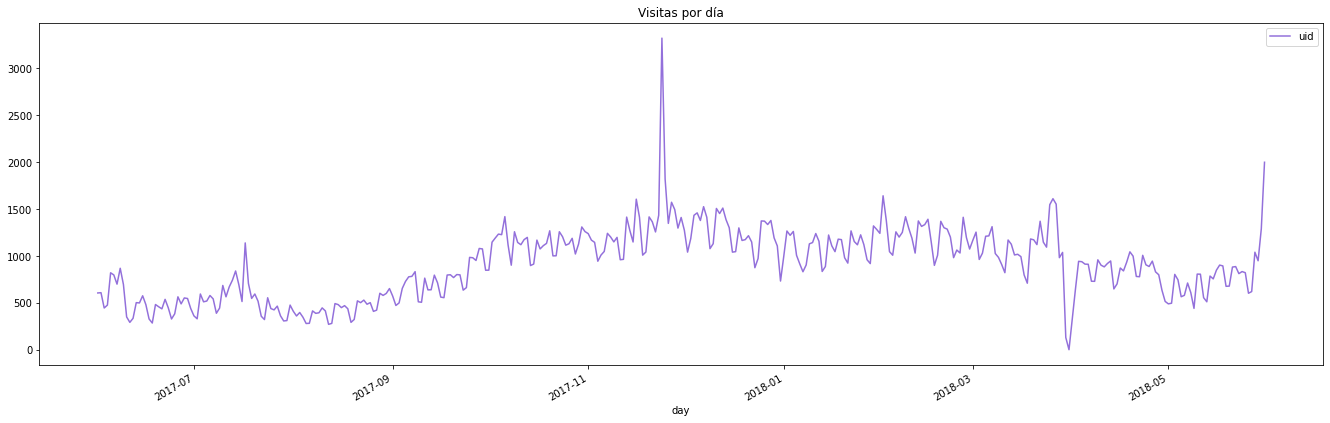

             uid
day             
2017-11-24  3319
2018-05-31  1997
2017-11-25  1817
2018-02-01  1640
2018-03-26  1609
...          ...
2017-08-13   281
2017-08-05   280
2017-08-12   271
2018-03-30   131
2018-03-31     1

[364 rows x 1 columns]


In [196]:
#Grafico visitas por día
dau_data=visitas.groupby('day').agg({'uid':'nunique'}).sort_values(by='uid',ascending=False)
dau_data.plot(figsize=(23,7),color='mediumpurple', title='Visitas por día')
plt.show()
print(dau_data)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcta y bonita gráfica! Y excelentes e inteligentes comentarios!!</div>

* En el día a día podemos ver variaciones en las visitas al sitio web. Sin embargo existe un día que alcanza el máximo con mas de 3000 usuarios y fue el 24 de noviembre del 2017 que se explica porque es el día más importante en todo el año  y hace referencia al dia de acción de gracias por lo que hace sentiod que más usuarios hayan visitaron el sitio web. 

* Por otro lado los 5 días con menos visitas en el 2017 fue en el mes de agosto dado que es un mes de vacaciones y para el 2018 fue el mes de marzo, habría que investigar y saber el contexto si en ese mes al no ser festivo hubo una baja considerable.

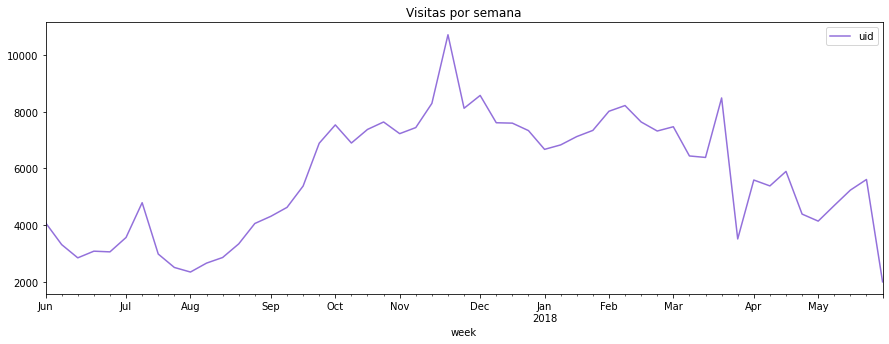

In [197]:
#Gráfico visitas por semana
weekly_sessions = visitas.groupby("week").agg({"uid": "nunique"})
weekly_sessions.plot(figsize=(15, 5), color='mediumpurple', title='Visitas por semana')
plt.show()


<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~En la gráfica de arriba tendría más sentido usar como función de agregación nunique, dada la sección en la que se encuentra la gráfica :) Actualiza los comentarios tras aplicar la corrección por favor~~
</div>

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

* Desde el mes de agosto del 2017 se puede ver un gran crecimiento en el número de visitas unicas desde 2.200 hasta llegar a un pico cerca de 11.000 hasta el mes de noviembre.
* En el 2018 es un año crucial que se puede ver el descenso que se logró conseguir en el 2017, llegando a un mínimo de 2000 visitas en la ultima semana de mayo.
* El número de visitas ha disminuido según la tendencia que se observa en el gráfico desde junio del 2017 hasta mayo del 2018.

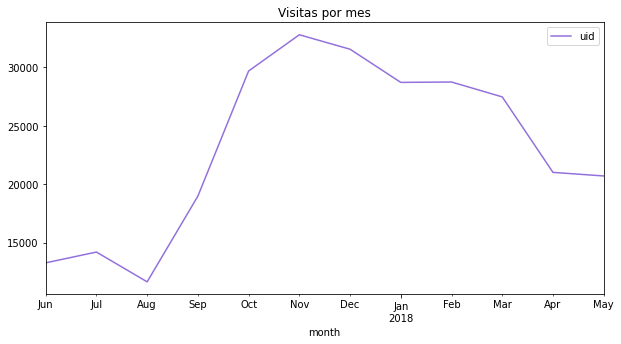

In [198]:
#Grafico Visitas por mes
mau_data = visitas.groupby("month").agg({"uid": "nunique"})
mau_data.plot(figsize=(10, 5), color='mediumpurple',title='Visitas por mes')
plt.show()

* La visitas mensuales en el 2017 tiene un crecimiento lineal desde agosto hasta alcanzar el pico en el mes de noviembre
* Desde el mes de noviembre del 2017 hasta el mes de mayo del 2018 ha ido a la baja en el número de visitas. 

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy biien!</div>

**2. ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).**

Realizaremos un grafico para ver la tendecia del número de sesiones totales por día en estos 2 años.

Promedio de sesiones por día: 1.082169644003972


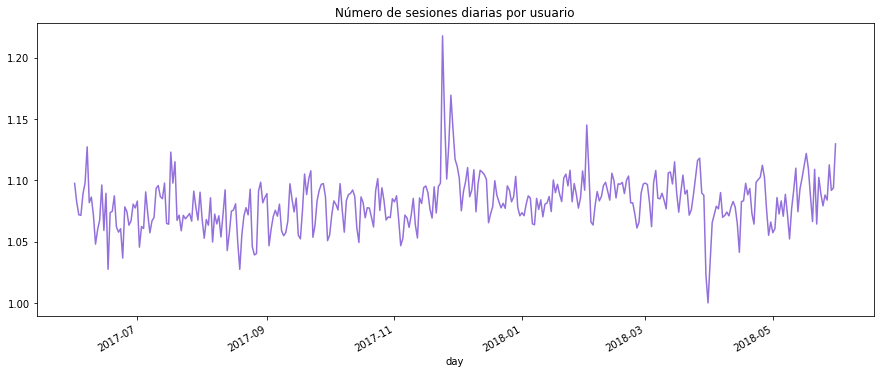

In [199]:
sesiones_por_dia=visitas.groupby('day').agg({'uid':['count', 'nunique']})
sesiones_por_dia.columns = ['n_sessions', 'n_users']
sesiones_por_dia['sess_per_user'] = sesiones_por_dia['n_sessions'] / sesiones_por_dia['n_users']
sesiones_por_dia['sess_per_user'].plot(figsize=(15,6),title='Número de sesiones diarias por usuario',color='mediumpurple')
promedio_por_dia=sesiones_por_dia['sess_per_user'].mean()
print('Promedio de sesiones por día:',promedio_por_dia)

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Me disculpo por el error en el brief, Sara, pero la pregunta es "¿cuántas sesiones hay por usuario por día?", es decir, tendrías que hacer el análisis que se hace en tu curso:~~
    
`sesiones_por_dia=visitas.groupby('day').agg({'Uid':['count', 'nunique']})
sesiones_por_dia.columns = ['n_sessions', 'n_users']
sesiones_por_dia['sess_per_user'] = sesiones_por_dia['n_sessions'] / sesiones_por_dia['n_users']`
    
~~Lo que graficarías, como haces tú, sería la columna `sesiones_por_dia['sess_per_user']` :) Y calcularías el promedio también, por supuesto.~~
    
~~**No olvides actualizas tus comentarios :)**~~

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

* El promedio de cuántas sesiones hay por usuario por día es 1.08. 
* El mes que alcanza un pico es diciembre 2017 con 1.25 sesiones por usuario y se justifica por la estacionalidad.
* El mes que se registra que cada usuario ingreso una sola vez al sitio web fue en abril del 2018.

**3.¿Cuál es la duración de cada sesión?**

Para obtener el tiempo de la duracion en segundos de cada sesión restaremos el tiempo de finalización del tiempo de inicio cuando ingresaron al sitio web y lo transformaremos a segundos.  

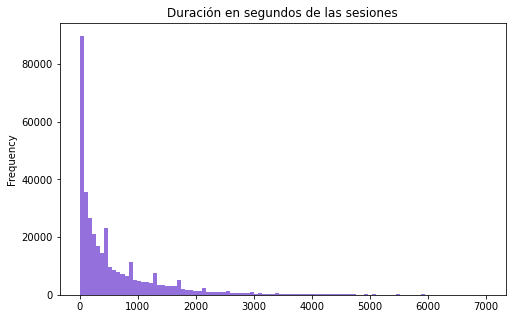

In [200]:
#Distribución de la duración de cada sesión en segundos
visitas["duration"] = (visitas["end_ts"] - visitas["start_ts"]).dt.seconds
visitas['duration'].plot(kind='hist', figsize=(8,5), bins=100, color='mediumpurple', title='Duración en segundos de las sesiones',range=(0,7000))
plt.show()

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Bien calculada la duración y perfecto histograma!</div>

In [201]:
visitas['duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration, dtype: float64

In [202]:
mediana= visitas['duration'].mode()
print('Moda de la duración de cada sesión en segundos son:', int(mediana))

Moda de la duración de cada sesión en segundos son: 60


<div class="alert alert-block alert-warning">

<b>Atención</b> <a class="tocSkip"></a>

Como viste en tu curso, si la distribución está muy lejos de ser normal, como aquí, conviene también calcular la **moda** de la columna 'duration' :) Es decir, la duración de sesión más común.

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

* La distribuciones de las sesiones no se distribuyen de manera uniforme. 
* La tabla nos indica que la media es mayor a la mediana por lo que el gráfico tiene un sesgo y asimetría positiva.
* La duracion minima es de 0 segundos, se podría establecer varias hipótesis en ese caso como: solo dio clic al link para el redireccionamiento del sitio web y a penas ingresó ya salió o que ingresó por error y salió de inmediato.
* La duracion máxima que observamos es de 84.480 segundos es decir que son 1.408 horas lo cual es un dato irreal que alguien pudo pasar ese tiempo en el sitio web y que ciertamente desvía los resultados, por lo que utilizaremos como estadístico a  la moda, que nos indica que son 60 segundos la duración de la sesión que son solo es 1 minuto. 
* El indicador de que pasa la mayoría de usuarios solo 1 minuto en el sitio web es muy bajo, por lo que debería el equipo de marketing evaluar o considerar otros factores que puedan influenciar.
* Con este dato tambien podemos concluir que en 1 minuto es poco probable que realizen alguna compra. 

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy buenos comentarios</div>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Buena gráfica extra la de arriba! Sin embargo, te comento que, como has visto en el curso, usar como función de agregación la suma en casos así puede llevar a interpretaciones no tan buenas de los datos (la suma de las duraciones mensuales no es una métrica que te diga mucho ya que se ve afectada fuertemente por el no. de usuarios), lo mejor sería usar ya sea la mediana o la moda (la media no, porque es una distribución nada normal, como ya viste)~~

<div class="alert alert-block alert-info">
<b>Ok, quité esa parte ya que no es necesario saberlo por mes y ya respondí la pregunta de cuánto es la duracion de cada sesión</b> <a class="tocSkip"></a>

In [203]:
#Cacularemos con qué frecuencia regresan al sitio web cada mes. 
sticky_factor=(dau/mau)*100
print('La frecuencia con la que regresan al sitio web es:', float(sticky_factor),'%')

La frecuencia con la que regresan al sitio web es: 3.908969652437603 %


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Ok, interesante calcular el sticky_factor!</div>

* La frecuencia con la que regresan cada mes es aproximado del 4%, lo cual es indicador que la audiencia no es muy leal.

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Actualiza tus comentarios de arriba de ser necesario~~

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

**3.1¿Cual es la distribución de la duración de las sesiones por dispositivo**

<AxesSubplot:title={'center':'Participación de la duración de la sesión por dispositivo '}, ylabel='duration'>

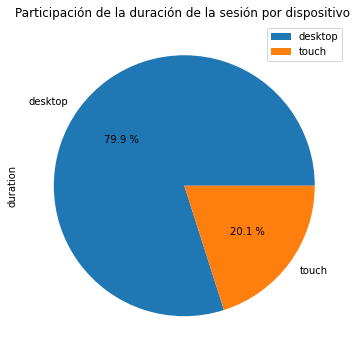

In [204]:
#Duración de la sesiones por dispositivo
visitas_pivot=visitas.pivot_table(index='device',values='duration',aggfunc='sum').plot(kind='pie',y ='duration',autopct='%0.1f %%',title='Participación de la duración de la sesión por dispositivo ',figsize=(10,6))
visitas_pivot

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buen agregado de esta gráfica! interesante!</div>

* Observamos que del tiempo total invertido en la navegación del sitio web, el 80% fue desde una laptop o computador, mientras que el 20% fue desde su dispositivo móvil. 

* La preferencia de los usuarios es utilizar un computador. Este sería un importante punto a evaluar o investigar si el diseño del sitio web cambia en la versión móvil o si se puede distorcionar mientras los usuarios navegan o que les resulte dificil encontrar las mismas secciones, la búsqueda, etc que por ese motivo prefieren hacerlo desde el computador.


<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Es incorrecto decir que el "80% de los usuarios" pasaron más tiempo en el sitio web desde PC, porque lo que te dice tu gráfica no es eso, sino que del total de tiempo invertido en la página, el 80% fue desde computadora. No sabes nada del número de usuarios :)~~
    

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

**4.¿Con qué frecuencia los usuarios y las usuarias regresan?**

Para sacar la frecuencia primero realizaremos un tabla agrupado por usuario para conocer cual fue el primer mes de visita al sitio web. Cambiaremos el nombre de la columna month por fist month para diferenciarlo.

In [205]:
#Mes de la primera visita
first_visits = visitas.groupby("uid").agg({"month": "min"}).reset_index().rename(columns={"month": "first_month"})
first_visits.head()

,uid,first_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01


Realizamos un merge del tipo izquierda empezando con el dataframe original de visitas para manetener todas las columnas y con la tabla anterior para adicionar a nuestra nueva tabla la fecha de la primera visita.

In [206]:
#Merge del datafram visitas con la tabla de first_visits
visits_with_first_visit = visitas.merge(first_visits, on="uid", how="left")
visits_with_first_visit.head()

,device,end_ts,source id,start_ts,uid,day,week,month,year,duration,first_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,1440,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,0,2017-12-01


Para este ejemplo a continuación comprobaremos que registros obtenemos para el siguiente usuario. 
Podemos ver que el usuario visitó el sitio web la primera vez el 30 de septiembre del 2017  y volvió a ingresar el 26 de febrero del 2018. Al tener la columna del first_month nos permitirá relizar el cálculo para conocer después de cuantos meses volvió a visitar la página.


In [207]:
#Ejemplo
ejemplo=visits_with_first_visit.query('uid== 325320750514679')
ejemplo

,device,end_ts,source id,start_ts,uid,day,week,month,year,duration,first_month
34588,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,325320750514679,2017-09-30,2017-09-28,2017-09-01,2017-01-01,540,2017-09-01
41778,desktop,2018-02-26 12:34:00,5,2018-02-26 12:33:00,325320750514679,2018-02-26,2018-02-22,2018-02-01,2018-01-01,60,2017-09-01


A continuación,obtendremos la diferencia en meses por cada registro para conocer despues de cuantos meses volvieron o no al sitio web. 
Dado que tenemos la información de 2 años, al resultado le sumaremos la diferencia de los años, multiplicada por 12 meses para no obtener la diferencia de meses en negativo.

In [208]:
#Cálculo en meses
visits_with_first_visit["months_diff"] = visits_with_first_visit["month"].dt.month - visits_with_first_visit["first_month"].dt.month
visits_with_first_visit["months_diff"] += 12*(visits_with_first_visit["month"].dt.year - visits_with_first_visit["first_month"].dt.year)
visits_with_first_visit.head()

,device,end_ts,source id,start_ts,uid,day,week,month,year,duration,first_month,months_diff
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,1440,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,0,2017-12-01,0


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Ok, correcta creación de la tabla de arriba :)</div>

Realizaremos una tabla dinámica a partir de los resultados anteriores para conocer la distribución de en que meses regresan al sitio web por los usuarios y lo representaremos en un mapa de calor.

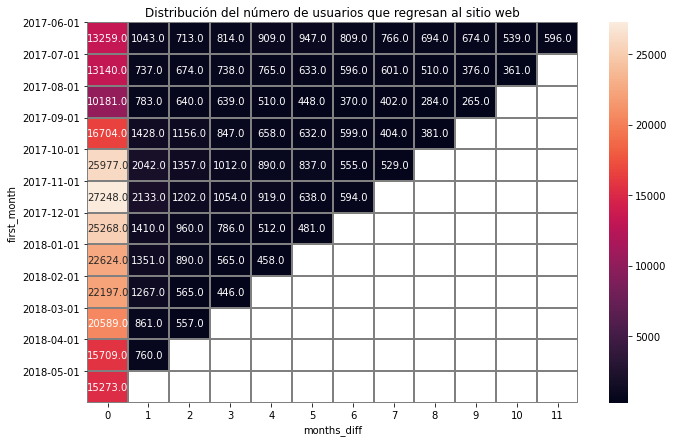

In [209]:
visits_with_first_visit['cohorte']= visits_with_first_visit['uid'].sum()
visits_with_first_visit['retention']=visits_with_first_visit['uid']/visits_with_first_visit['cohorte']
retention_table = visits_with_first_visit.pivot_table(
    index="first_month",
    columns="months_diff",
    values="retention",
    aggfunc="nunique"
)
retention_table.fillna("")

plt.figure(figsize=(11, 7))
plt.title('Distribución del número de usuarios que regresan al sitio web')
sns.heatmap(
    retention_table,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 

plt.yticks(list(range(0,12)),retention_table.index.astype('str'))
plt.show()

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~La tabla de arriba es incorrecta. Uid es el ID de cada usuario, una clave, no entiendo por qué los sumas para obtener la columna "cohorte". Y luego calculas la columna "retention" dividiendo las claves Uid entre la columna "cohorte". Me sigues? Es algo que no tiene sentido. ~~
    
~~Por favor haz de nuevo tu tabla dinámica de arriba. La intención es crear una tabla dinámica que cuente el **no. de usuarios únicos** de cada cohorte, conforme va variando el mes de ciclo de vida, es decir, `'months_diff'`. Me explico?~~
    
~~**No olvides cambiar tus resultados de abajo**~~

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

En la parte izquierda, en first_month, hay textos extra desagradables y sin utilidad, los que dicen "T00:00:00.000...". Sería mejor que los quitaras :)

**Esto aplica para todos tus heatmap**
</div>

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

* Al ser pocos los números de usuarios que regresan al sitio web no encontramos ninguna diferencia en el mapa de calor ya que estan todos los registros por debajo de los 2200.
* Para las cohortes de septiembre, octubre y noviembre son los usuarios que más regresan después del primer mes. 
* Desde la cohorte de septiembre en adelante vemos que al pasar los meses despues de su primera visita se va reduciendo el número de usuarios únicos que vuelven, sin embargo para la cohorte de juio del 2017 aumenta la retención desde el mes 3 hasta el 5. 

En este paso realizaremos la división del número de usuarios por cada mes sobre el mes 0 que nos indica el total de usuarios que ingresaron al sitio web por primera vez. 
De esta manera obtendremos los porcentajes por cada mes y será más fácil identificar la tasa para cada cohorte y en que meses es más frecuente el regreso de visita a la página web.

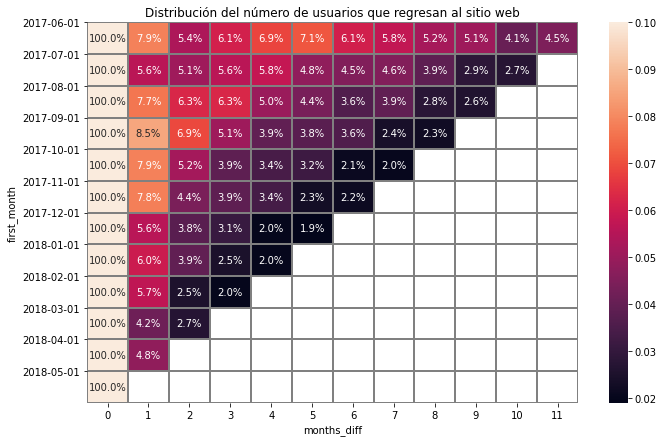

In [210]:
retention_rates = retention_table
for col in retention_rates.columns[1:]:
    retention_rates[col] = retention_rates[col] / retention_rates[0]

retention_rates[0] = retention_rates[0]/retention_rates[0]

retention_rates.fillna("")

plt.figure(figsize=(11, 7))
plt.title('Distribución del número de usuarios que regresan al sitio web')
sns.heatmap(
    retention_rates,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='gray', vmax=0.1
) 

plt.yticks(list(range(0,12)),retention_table.index.astype('str'))
plt.show()

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Esto de arriba sí es correcto :) Muy bien!!</div>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Sólo hay que agregar la opción vmax en la gráfica para que se vea mejor todo:~~

    sns.heatmap(
        retention_rates,
        annot=True,
        fmt='.1%',
        linewidths=1,
        linecolor='gray',
        vmax=0.1
    ) 

<div class="alert alert-block alert-info">
<b>Ok, gracias</b> <a class="tocSkip"></a>

Sacaramos un promedio de cada mes en el inicio de un nuevo trimestre para conocer la tasa de retención.

In [211]:
print(f'Un {retention_rates[1].mean()*100}% regresan después del primer mes')

Un 6.516659710392834% regresan después del primer mes


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buenos cálculos de los promedios después de ciertos meses!</div>

In [212]:
print(f'Un {retention_rates[4].mean()*100}% regresan después del cuarto mes')

Un 4.059456910300263% regresan después del cuarto mes


In [213]:
print(f'Un {retention_rates[7].mean()*100}% regresan después del séptimo mes')

Un 3.750911822830765% regresan después del séptimo mes


In [214]:
print(f'Un {retention_rates[10].mean()*100}% regresan después del décimo mes')

Un 3.4062498313944993% regresan después del décimo mes


* Los porcentajes de retención son bajos y a medida que pasan los meses la tasa disminuye como vimos en el cuarto, sétimo y décimo mes, claramente a medida que el tiempo pasa la fidelidad del cliente es menor.
* La cohorte de junio del 2017 aumenta la tasa de retención en el mes 3,4 y 5.
* Si analizamos la cohorte del 1 de septiembre del 2017 es la que obtuvo mayor tasa de retención con un 8.5%
* Para abril del 2018 vemos que solo el 4.8% de los usuarios regresaron después del primer mes y después ya no volvieron a regresar. 

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Buenos comentarios los de arriba, sólo actualízalos tras las correcciones~~

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

**Conclusiones intermedias**

* El promedio diario son: 907 usuarios
* El promedio de uso del sitio web semanal  son: 5.621 usuarios
* El promedio de uso del sitio web mensual son: 23.228 usuarios
* El promedio del número de sesiones por día y por usuario es 1.08
* La moda de la duración son 60 segundos
* El 80% del tiempo de navegación se pasa más  desde una laptop o computador, mientras que el 20% se conecta desde su dispositivo móvil. 
* La frecuencia con la que regresan los usuarios mensual es: 3.90% 
* La tasa de retención es: 
    después del primer mes es un 6.51%,
    después del cuarto mes es: 4.05%, 
    después del séptimo mes es: 3.75%
    después del décimo mes es: 3.40%


<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~También actualiza tus conclusiones intermedias por favor, las que sea necesario actualizar :)~~

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

# 3.2 Métricas de ventas

**1.¿Cuándo la gente empieza a comprar?**

Crearemos un dataframe a partir de la tabla original de orders y agruparemos por el Id del usuario y agregaremos una nueva columna en orders para traer el mes de compra.

In [215]:
orders['month']=orders['buy_ts'].astype("datetime64[M]")

<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Arriba no debes cambiar `buy_ts` a tipo mes, perderás la información de **día exacto y hora**. Si quieres agregar columna del mes, **agrega una columna nueva pero preserva `buy_ts` como estaba**.~~

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

In [216]:
first_orders=orders.groupby('uid').agg({'buy_ts':'min'}).reset_index().rename(columns={"buy_ts": "first_purchase"})
first_orders.head()

,uid,first_purchase
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


<div class="alert alert-block alert-success">
<b>Éxito v2</b> <a class="tocSkip"></a>

Mantén el cálculo de esta tabla de arriba **tal y como está**, por favor!, ya que sí debes de encontrar los mínimos de `buy_ts`    
</div>

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcta tabla!    
</div>

Queremos saber cuántos días pasan desde que el usuario ingresa por primera vez a nuestro sitio web hasta que realiza su primera compra. 

Por lo que utilizaremos los 2 dataframes que hemos creado: first_visits y first_orders y realizaremos un merge basado en el Id del usuario y eliminaremos cualquier valor ausente, dado que debe haber usuarios que visitaron el sitio web pero que no hicieron ninguna compra.

Obtendremos la diferencia entre las fechas de la primera visita y la fecha de la primera compra y lo transformaremos al formato de días y realizaremos un histograma para visualizar la distibución.

<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Las columnas del mes siempre tienen el día 1 del mes, no llevan la fecha correcta exacta, por eso te había dicho que encontraras los mínimos de start_ts, para una exactitud adecuada, para usar en los cálculos los días exactos en que se compró y se visitó por primera vez. Entonces, abajo, en la primera línea, agrupa encontrando el **mínimo de la columna `'start_ts'`**, por favor.~~
</div>

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

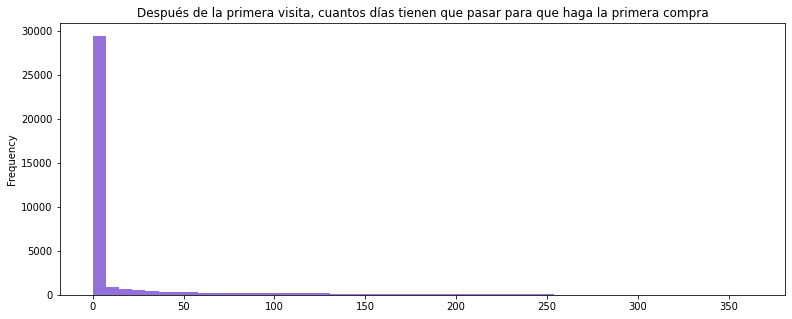

In [217]:
first_visits = visitas.groupby("uid").agg({"start_ts": "min"}).reset_index().rename(columns={"start_ts": "first_month"})


first_visits_with_first_purchase = first_visits.merge(first_orders, on="uid", how="left")
first_visits_with_first_purchase = first_visits_with_first_purchase.dropna()



first_visits_with_first_purchase["time_to_first_purchase"] = ((first_visits_with_first_purchase["first_purchase"] - first_visits_with_first_purchase["first_month"])/ np.timedelta64(1,'D')).astype('int') 
#first_visits_with_first_purchase["time_to_first_purchase"] = first_visits_with_first_purchase["time_to_first_purchase"].dt.days



first_visits_with_first_purchase["time_to_first_purchase"].plot(kind="hist", figsize=(13, 5), bins=50, color='mediumpurple', title='Después de la primera visita, cuantos días tienen que pasar para que haga la primera compra')
plt.show()


In [218]:
first_visits_with_first_purchase.reset_index(drop=True).head()

,uid,first_month,first_purchase,time_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Arriba, para `first_visits`, debes de encontrar el valor mínimo de `Start Ts`. Si no, no estás siendo precisa para encontrar el intervalo exacto de días en el que se hace la primera compra.~~
</div>

<div class="alert alert-block alert-info">
<b>Dentro de first_visits esta el dataframe original de visitas que antes de calcular el dau,mau y wau le convertí a días, meses, y años y estoy llamando a esa misma columna de 'month' y aplicando el mínimo. Con todo me di cuenta del error que estaba cometiendo en la columna de first_purchase que no tenia el tipo de dato de mes, ya se encuentra corregido y el histogrma es diferente ahora.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Fuera de eso, correcto hacer un histograma y original cálculo de time_to_first_purchase!</div>

In [219]:
first_visits_with_first_purchase["time_to_first_purchase"].describe()

count    36522.000000
mean        16.730327
std         46.959650
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: time_to_first_purchase, dtype: float64

In [220]:
first_visits_with_first_purchase

,uid,first_month,first_purchase,time_to_first_purchase
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
22,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
35,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
36,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
38,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0
...,...,...,...,...
228142,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,95
228143,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,0
228148,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,231
228161,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,103


In [221]:
avg_first_order= first_visits_with_first_purchase["time_to_first_purchase"].mode()
avg_first_order

0    0
dtype: int64

* La distribución no es uniforme y esta con un sesgo positivo que indica una tendencia casi lineal y decreciente siendo pocos los usuarios que hicieron su primera compra después de 150 días en adelante.
* Usamos la moda para evitar que los días atípicos interfieran en el resultado que en la mayoría fue de 0 días.
* Los usuarios realizan en su mayoría la compra el mismo día en que visitaron el sitio web, en el histograma podemos ver que fueron 30.0000 usuarios aproximadamente;la intepretación es que  su poder de decisión es alto.



<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Por favor actualiza tus comentarios de ser necesario ya que cambiará tu histograma y tu moda quizá~~</div>

<div class="alert alert-block alert-info">
<b>Okay, Si cambió el histograma pero la moda fue igual de 0 días.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Habrá que actualizar tus comentarios y conclusiones. Te recomiendo encontrar también la moda de la columna de time_to_first_purchase~~

~~**Tampoco olvides actualizar todos los comentarios de la sección 1.2**~~
</div>

<div class="alert alert-block alert-info">
<b>Ok.</b> <a class="tocSkip"></a>

**1.2 Tiempo de conversión por cohorte**

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Gracias por intentar profundizar más con esta sección que agregas, Sara!    
</div>

Es importante que podamos identificar y segmentar a los usuarios de acuerdo al tiempo de espera en días para hacer su primera compra.De esta manera podremos conocer la distribución de cuantos clientes compran en el mismo mes y cuantos en otros meses. 

Los 2 segmentos que clasificaremos son: 
    
A: 0 días

B: Más de 0 días.


<div class="alert alert-block alert-warning">
<b>Atención v3</b> <a class="tocSkip"></a>

Ok, pero recomendaría crear categorías diferentes, ya que como viste la mayoría de usuarios tardaron cero días en hacer su primera compra, entonces podría ser mejor las categorías: A) 0 días, B) más de 0 días.</div>

<div class="alert alert-block alert-info">
<b>Ok.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Quizá quieras redefinir tus categorías de ser necesario :) **Corrige también todos los comentarios que se necesiten en esta sección**~~</div>

<div class="alert alert-block alert-info">
<b>No cambió mucho la distribución del histograma, asi que consideré necesario mantener  los 2 segmentos .</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Quizá deberías considerar redefenir tus categorías tras revisar el histograma correcto. Quizá quieras hacer menos categorías~~</div>

<div class="alert alert-block alert-info">
<b>Ok.</b> <a class="tocSkip"></a>

In [222]:
#Formula con intervalos en días
def segmentacion(dias): 
    
    if dias < 30:
        return "A"
    else:
        return "B"


In [223]:
#Comprobación de la formula 
segmentacion(first_visits_with_first_purchase.loc[3,'time_to_first_purchase'])

'B'

In [224]:
#Aplicación de la fórmula al dataframe y creación de la columna de segmentación 
first_visits_with_first_purchase['Segmentacion']=first_visits_with_first_purchase['time_to_first_purchase'].apply(segmentacion)
first_visits_with_first_purchase.reset_index(drop=True).head()


,uid,first_month,first_purchase,time_to_first_purchase,Segmentacion
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106,B
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,A
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0,A
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0,A
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,A


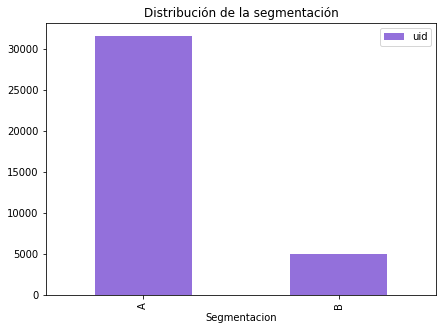

In [225]:
f= first_visits_with_first_purchase.pivot_table(index='Segmentacion',values='uid',aggfunc='count').plot(kind='bar',color='mediumpurple',title='Distribución de la segmentación',figsize=(7,5))
plt.show()

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Ok, bonita manera de mostrarlo! Aunque con casos así creo que sería mejor una gráfica de barras normal :)   
</div>

<div class="alert alert-block alert-info">
<b>Ok.</b> <a class="tocSkip"></a>

* La distribución indica que los segmentos de clientes  A son los más altos, es decir que sus días de decisión de compra es inmediata.

* Solo 5000 clientes compraron en más de o días, realmente son muy pocos y eso es mejor para el negocio.



De igual manera, sería interesante conocer por la cohorte en la que hicieron su primera compra, cual es la distrubución del número de usuarios entre los 2 segmentos.
Esto nos permitirá identificar visualmente a través de un mapa de calor que cohorte compró en menor tiempo e identificar por segmento como se encuentra la distribución, que incluso nos daría una idea de como es la cartera de clientes en cuanto a los días de compras o pagos.

In [226]:
#Transformacion al datetime
first_visits_with_first_purchase['first_purchase_month']=first_visits_with_first_purchase['first_purchase'].astype("datetime64[M]")


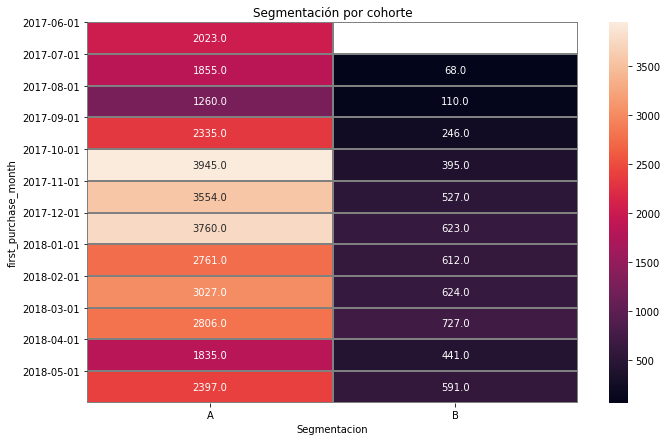

In [227]:
#Mapa de calor -segmentación por cohorte
retention_table2 = first_visits_with_first_purchase.pivot_table(
    index="first_purchase_month",
    columns="Segmentacion",
    values="uid",
    aggfunc="count"
)
retention_table2.fillna("")

plt.figure(figsize=(11, 7))
plt.title('Segmentación por cohorte')
sns.heatmap(
    retention_table2,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 

plt.yticks(list(range(0,12)),retention_table2.index.astype('str'))
plt.show()

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Ok, ilustrativa tabla de arriba!    
</div>

In [228]:
print('N° promedio de Clientes A:',retention_table2['A'].mean())
print('N° promedio de Clientes B:',retention_table2['B'].mean())


N° promedio de Clientes A: 2629.8333333333335
N° promedio de Clientes B: 451.27272727272725


In [229]:
print('**Cohorte-Abril del 2018** son:',retention_table2.loc['2018-04-01'].sum(),'clientes')

**Cohorte-Abril del 2018** son: 2276.0 clientes


* En este cohorte por segmentación observamos que en promedio tenemos 2.629clientes como A y 451 como B.
* Encontramos una característica especial que la cohorte de junio del 2017 fue la única que compró en ese mismo mes que visitó la página porque todos son A. 
* En octubre del 2017 se registra el mayor número de clientes siendo 3761 que compraron en el mismo mes.


**2.¿Cuántos pedidos hacen durante un período de tiempo dado?**

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Lo siento, Sara, el enfoque de toda esta sección "*2.¿Cuántos pedidos hacen durante un período de tiempo dado?*" es incorrecto. Siento si el brief no es lo suficientemente claro. Tienes que hacer una tabla dinámica en la que se muestren los cambios en el **número promedio de pedidos por cliente en relación con el mes de ciclo de vida de la cohorte**. No te preocupes, el ejemplo análogo está en Practicum, en el capítulo "Análisis de cohortes", en **los ejercicios** de la lección "Evaluar los cambios en valores relativos por ciclo de vida"~~</div>

<div class="alert alert-block alert-info">
<b>Ok, gracias seguí el ejemplo</b> <a class="tocSkip"></a>

Vamos a calcular métricas de cohorte adicionales por mes:
- Número de pedidos promedio por usuario para cada mes;
- Orden del pedido del mes en relación con el mes en que se realizó el primer pedido

In [230]:
#Orden del pedido del mes en relación con el mes en que se realizó el primer pedido
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min()
#Renombre
first_order_date_by_customers.name = 'first_order_date'

orders1 = orders.join(first_order_date_by_customers, on='uid')
orders1['first_order_month'] = orders1['first_order_date'].astype(
    'datetime64[M]')

orders1['order_month'] = orders['buy_ts'].astype('datetime64[M]')
cohort_sizes = orders1.groupby('first_order_month')['uid'].nunique().reset_index()

#Agrupación por cohortes: first order month y por mes de compra
orders_grouped_by_cohorts = orders1.groupby(
    ['first_order_month', 'order_month']
).agg({'revenue': 'count'}).reset_index()

orders_grouped_by_cohorts = orders_grouped_by_cohorts.merge(cohort_sizes, on='first_order_month')
print(orders_grouped_by_cohorts.head()) 

  first_order_month order_month  revenue   uid
0        2017-06-01  2017-06-01     2354  2023
1        2017-06-01  2017-07-01      177  2023
2        2017-06-01  2017-08-01      174  2023
3        2017-06-01  2017-09-01      226  2023
4        2017-06-01  2017-10-01      292  2023


<div class="alert alert-block alert-warning">
<b>Atención v4</b> <a class="tocSkip"></a>

Por alguna razón no me di cuenta de un error, lo siento Sara! Pero por esta ocasión me tomo la libertad de arreglarlo yo. Tenías tú esto arriba:

`orders_grouped_by_cohorts = orders1.groupby(
    ['first_order_month', 'buy_ts']
).agg({'revenue': 'count'}).reset_index()`
    
Y como ves deberías de haber agrupado por el mes de orden. Y listo! ahora sí obtienes una tabla lógica abajo :)
</div>

<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

* ~~La pregunta es cuántos pedidos se hacen, es decir, el no. de pedidos promedio por usuario, no cuál es el ingreso promedio por usuario, así que arriba en `orders_grouped_by_cohorts`, en vez de `'revenue': 'sum'`, debes tener `'revenue': 'count'`.~~

* ~~El tamaño de la cohorte se calcula **sólo con los usuarios que hay al principio para cada cohorte**, es decir, habría que añadir unas cuantas líneas y modificar algunas líneas en la celda de arriba, en concreto en la parte final:~~
    
        cohort_sizes = orders1.groupby('first_order_month')['uid'].nunique().reset_index()

        #Agrupación por cohortes: first order month y por mes de compra
        orders_grouped_by_cohorts = orders1.groupby(
            ['first_order_month', 'buy_ts']
        ).agg({'revenue': 'count'}).reset_index()

        orders_grouped_by_cohorts = orders_grouped_by_cohorts.merge(cohort_sizes, on='first_order_month')

        print(orders_grouped_by_cohorts.head()) 
</div>

<div class="alert alert-block alert-info">
<b>Ok, gracias</b> <a class="tocSkip"></a>

Ahora buscamos el número de pedidos promedio por usuario, creando una columna con el nombre: orders_per_user.

In [231]:
orders_grouped_by_cohorts['orders_per_user'] = (
    orders_grouped_by_cohorts['revenue']
    / orders_grouped_by_cohorts['uid']
) 


Ahora vamos a encontrar el ciclo de vida de la cohorte. Restaremos el mes de la cohorte (first_order_month) del mes en que se realizaron las compras (buy_ts)
Después convertiremos este tipo al número de meses entre las dos fechas. Hay que dividir cohort_lifetime entre el valor constante np.timedelta64(1, 'M')

In [232]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()

#Ciclo de vida de la cohorte
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['order_month']
    - orders_grouped_by_cohorts['first_order_month']
)


#Conversion a meses
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
print(orders_grouped_by_cohorts['cohort_lifetime'].head()) 

0    0.000000
1    0.985647
2    2.004148
3    3.022649
4    4.008296
Name: cohort_lifetime, dtype: float64


Obtenemos números decimales como resultados, dado que los meses tienen de 28 a 31 días. Vamos a redondear los valores de la columna cohort_lifetime usando el método round(), depués los convertiremos a números enteros con el método astype('int'). 

Imprimeremos las primeras 5 y ultimas filas para ver si se aplicó a todo el dataframe


In [235]:
#Redondeo y conversión a numero entero
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
)

#Primeras 5 filas
print(
    orders_grouped_by_cohorts[
        ['first_order_month', 'order_month', 'cohort_lifetime']
    ].head()
)

# Ultimas 5 filas
print(
    orders_grouped_by_cohorts[
        ['first_order_month', 'order_month', 'cohort_lifetime']
    ].tail()
) 

  first_order_month order_month  cohort_lifetime
0        2017-06-01  2017-06-01                0
1        2017-06-01  2017-07-01                1
2        2017-06-01  2017-08-01                2
3        2017-06-01  2017-09-01                3
4        2017-06-01  2017-10-01                4
   first_order_month order_month  cohort_lifetime
73        2018-03-01  2018-04-01                1
74        2018-03-01  2018-05-01                2
75        2018-04-01  2018-04-01                0
76        2018-04-01  2018-05-01                1
77        2018-05-01  2018-05-01                0


Ahora tenemos números enteros de meses pero convertiremos los objetos Series de tipo datetime en strings en formato de date. 

In [236]:
orders_grouped_by_cohorts['first_order_month'].dt.strftime('%d.%m.%Y') 

0     01.06.2017
1     01.06.2017
2     01.06.2017
3     01.06.2017
4     01.06.2017
         ...    
73    01.03.2018
74    01.03.2018
75    01.04.2018
76    01.04.2018
77    01.05.2018
Name: first_order_month, Length: 78, dtype: object

Dejemos solo el año y el mes en los datos del mes de la primera compra:

In [237]:
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts[
    'first_order_month'
].dt.strftime('%Y-%m') 


In [238]:
orders_grouped_by_cohorts

,index,first_order_month,order_month,revenue,uid,orders_per_user,cohort_lifetime
0,0,2017-06,2017-06-01,2354,2023,1.163618,0
1,1,2017-06,2017-07-01,177,2023,0.087494,1
2,2,2017-06,2017-08-01,174,2023,0.086011,2
3,3,2017-06,2017-09-01,226,2023,0.111715,3
4,4,2017-06,2017-10-01,292,2023,0.144340,4
...,...,...,...,...,...,...,...
73,73,2018-03,2018-04-01,178,3533,0.050382,1
74,74,2018-03,2018-05-01,176,3533,0.049816,2
75,75,2018-04,2018-04-01,2495,2276,1.096221,0
76,76,2018-04,2018-05-01,195,2276,0.085677,1


Ahora vamos a compilar una tabla dinámica de cambios en los números de pedidos promedio por usuario cuyas columnas contendrán el ciclo de vida y las filas serán cohortes:

In [239]:
orders_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='orders_per_user',
    aggfunc='mean',
).cumsum(axis=1)

orders_per_user_pivot.round(2).fillna('')


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02,1.12,1.18,1.21,1.22,,,,,,,,


<div class="alert alert-block alert-danger">

<b>A resolver v3</b> <a class="tocSkip"></a>

~~Redondea hasta después, hasta que ya muestres tu tabla, si no hay errores y se redondea incorrectamente como aquí arriba.~~
    
~~Es decir, en tu línea final es cuando debes de redondear y rellenar ausentes:~~
    
~~`orders_per_user_pivot.round(2).fillna('')`~~
    
~~**NO** uses .round(2) antes de eso, por favor :)~~

<div class="alert alert-block alert-info">
<b>Ok, pero quedó igual.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Atención v4</b> <a class="tocSkip"></a>

Sí, más arriba puedes encontrar un comentario amarillo que lo explica :)</div>

<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Para representar mejor los datos, en estas tablas suele mostrarse la suma acumulada:~~
    
    revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
        index='first_order_month',
        columns='cohort_lifetime',
        values='revenue_per_user',
        aggfunc='mean',
    ).cumsum(axis=1)
    
~~**Actualiza tus comentarios de abajo tras las correciones por favor :)**~~

<div class="alert alert-block alert-info">
<b>Ok, gracias</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Atención v2</b> <a class="tocSkip"></a>

~~También te recomiendo que cuando muestres la tabla `revenue_per_user_pivot`, redondees a 2 decimales y rellenes los ausentes con `''`, así se vería más presentable tu tabla :)~~</div>

<div class="alert alert-block alert-info">
<b>Ok, gracias</b> <a class="tocSkip"></a>

* Podemos ver en la tabla dinámica que en promedio son 0 número de pedidos por cada cohorte y por el ciclo de vida.



<div class="alert alert-block alert-danger">

<b>A resolver v4</b> <a class="tocSkip"></a>

Ahora sí puedes cambiar tus comentarios de arriba :)</div>

<div class="alert alert-block alert-danger">

<b>A resolver v3</b> <a class="tocSkip"></a>

Actualiza tus comentarios de arriba por favor.

<div class="alert alert-block alert-info">
<b>no me cambió la tabla...</b> <a class="tocSkip"></a>

**3.¿Cuál es el tamaño promedio de compra?**


**Mensual**

Comenzaremos primero calculando el ingreso promedio que significa para Ya.Afisha por los usuarios en cada cohorte, para eso sacaremos la suma total de ventas en cada cohorte y lo divideremos para el número de usuarios.

In [68]:
orders['buy_ts']=orders['buy_ts'].astype("datetime64[M]")

             uid   revenue  avg_sale
buy_ts                              
2017-12-01  6218  36388.60  5.852139
2018-03-01  5326  28834.59  5.413930
2017-10-01  5679  27987.70  4.928280
2017-11-01  5659  27069.93  4.783518
2018-02-01  5281  25560.54  4.840095
2018-05-01  4346  20735.98  4.771279
2018-01-01  4721  19417.13  4.112927
2017-09-01  3387  18345.51  5.416448
2018-04-01  3273  16858.06  5.150645
2017-07-01  2363  12539.47  5.306589
2017-06-01  2354   9557.49  4.060106
2017-08-01  1807   8758.78  4.847139


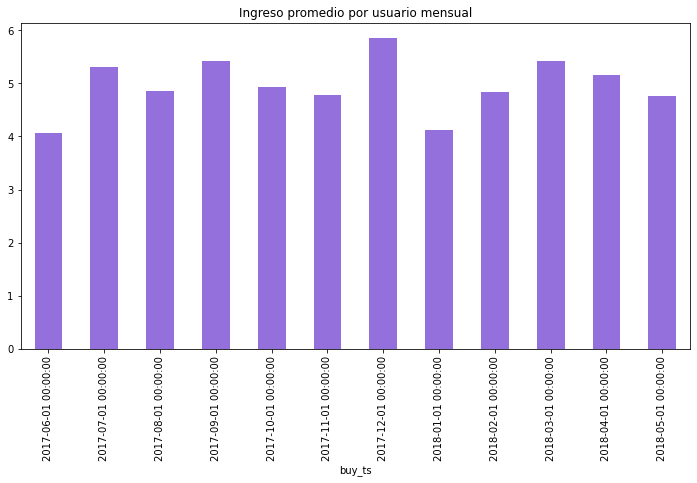

In [69]:
#Ingreso promedio por usuario en cada cohorte.
avg_monthly_orders = orders.groupby("buy_ts").agg({"uid": "count", "revenue": "sum"})

avg_monthly_orders["avg_sale"] = avg_monthly_orders["revenue"] / avg_monthly_orders["uid"]
print(avg_monthly_orders.sort_values(by='revenue',ascending=False))


avg_monthly_orders["avg_sale"].plot(kind="bar", figsize=(12, 6),color='mediumpurple',title='Ingreso promedio por usuario mensual')
plt.show()

* En la tabla observamos que los ingresos desde el primer mes en junio del 2017 hasta junio del 2018 las ventas van decreciendo, no existe un mes en el que se venda más que el anterior esos son datos preocupantes que nos indican que han algun problema o fallo de estrategia comercial.
* El ingreso promedio nos indica que son va desde los 3.42  hasta los 5.85 dólares que gasta en promedio el usuario cuando realiza una compra. 
* Dado que el ingreso promedio es bajo se debe compensar en el volumen de ventas totales que se obtengan.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>



Correcta gráfica y comentarios arriba!

**Año**


Relizaremos el mimso cáclulo anterior para conocer si existe un variación en el ingreso promedio entre el 2017 y el 2018.

In [70]:
orders['year']=orders['buy_ts'].astype("datetime64[Y]")

<AxesSubplot:title={'center':'Ingreso promedio por usuario en el 2017 y 2018'}, xlabel='year'>

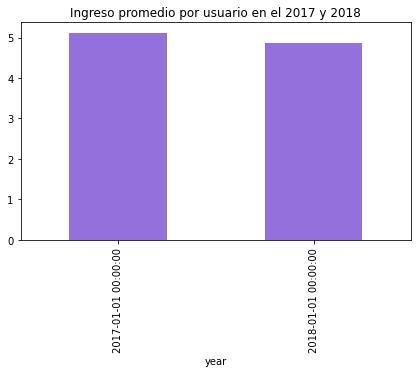

In [71]:
#Ingreso promedio por año.
avg_year_orders = orders.groupby("year").agg({"uid": "count", "revenue": "sum"})
avg_year_orders["avg_sale"] = avg_year_orders["revenue"] / avg_year_orders["uid"]

avg_year_orders["avg_sale"].plot(kind='bar',title='Ingreso promedio por usuario en el 2017 y 2018',color='mediumpurple',figsize=(7,4))

In [72]:
print('Promedio de ingresos general es:',orders['revenue'].mean())

Promedio de ingresos general es: 4.9996782639742925


* Con esta gráfica de barras podemos concluir que ciertamente no existe una gran diferencia en el ingreso promedio que nos traen los usuarios, ya que son centavos unicamente. 
* Esto nos da una pista que los clientes continuaron comprando en promedio 5 dólares durante el 2017 y 2018, pero la diferencia fue que disminuyó el volumen de clientes (ordenes de compra) en el 2018.

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Ok, interesante! sólo faltaría complementar calculando el promedio general, es decir, el promedio de toda la columna `orders["Revenue"]`. Y comentar al respecto :)~~</div>

<div class="alert alert-block alert-info">
<b>Ok.</b> <a class="tocSkip"></a>

**4.-¿Cuál es el canal de marketing más efectivo?**

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~No se puede añadir una columna nueva al dataframe `orders` de este modo como haces abajo. Tendrías que hacer un .merge(), como siempre. Pero primero, **hay que obtener el source id correspondiente a cada Uid**. Cada usuario puede haber usado distintos source id, pero el **source id que importa es el primero que usó**. Entonces, del dataframe `visitas`, debes de obtener la lista del primer source id que empleó cada usuario, y estos valores los unirás al dataframe `orders` con un .merge() (usando la opción `on='Uid'`).~~
    
~~**TRAS APLICAR ESTA CORRECCIÓN, ACTUALIZA TODA ESTA SECCIÓN POR FAVOR**~~

<div class="alert alert-block alert-info">
<b>Ok.</b> <a class="tocSkip"></a>

Necesitamos conocer el primer source id que usó el usuario dentro del dataframe de visitas.

In [73]:
visitas_per_source = visitas.sort_values(by='start_ts').groupby("uid").agg({"source id": "first"})
visitas_per_source.head()

,source id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Arriba estás encontrando el mínimo source id, que no necesariamente es el primero, pues si un usario usó los source id 2 y 7, y el 7 lo usó primero, tu función le otorgará el source id de 2, lo cual es erróneo. Para obtener el primer source id debes de hacer esto:~~

~~`visitas_per_source = visitas.sort_values(by='start_ts').groupby("uid").agg({"source id": "first"})`~~
    
~~Ordenas por fecha los datos y después obtienes el primer dato, lo cual es correcto porque ya están ordenados~~

<div class="alert alert-block alert-info">
<b>Ok, gracias</b> <a class="tocSkip"></a>

Crearemos un nuevo dataframe para almacenar la nueva tabla de merge entre el usuario con la identificación de la primera source id que ingresó con el dataframe de orders.

In [74]:
orders_and_visits=orders.merge(visitas_per_source,on='uid',how='left')

orders_and_visits.head()

,buy_ts,revenue,uid,month,year,source id
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-01-01,1
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-01-01,2
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-01-01,2
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-01-01,2
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-01-01,3


<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Arriba lo mejor es usar `how='left'`, así ya no tendrás ausentes qué eliminar :)~~
    
~~**TODOS TUS RESULTADOS SIGUIENTES, RELACIONADOS AL SOURCE ID, QUIZÁ CAMBIEN NOTORIAMENTE, ATENTA PARA QUE ACTUALICES TUS COMENTARIOS :)**~~

<div class="alert alert-block alert-info">
<b>Ok, gracias</b> <a class="tocSkip"></a>

Una vez realizado el cruce en base a cada usuario único con el dataframe de orders, podemos proceder a realizar un gráfico de barras para conocer que fuente generó mayores ingresos.

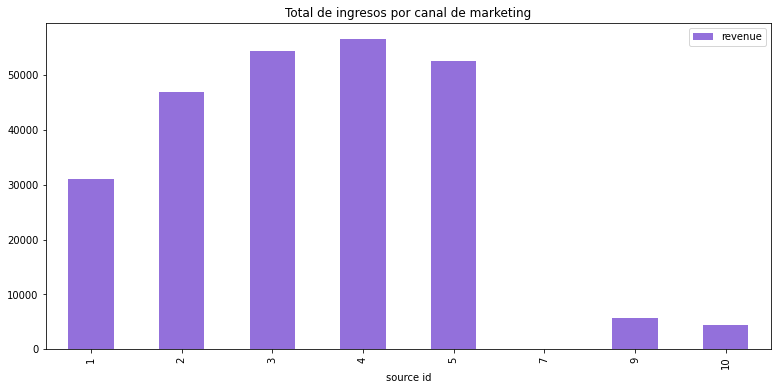

            revenue
source id          
4          56693.41
3          54511.24
5          52624.02
2          46923.61
1          31090.55
9           5759.40
10          4450.33
7              1.22


In [75]:
#Ingresos por canal de marketing.
orders_pivot=orders_and_visits.pivot_table(index='source id',values='revenue',aggfunc='sum')
orders_pivot.plot(kind='bar',figsize=(13,6),title='Total de ingresos por canal de marketing',color='mediumpurple')
plt.show()
print(orders_pivot.sort_values(by='revenue',ascending=False))

* La fuente 4 es la líder y con mayores ingresos de 56.693 durante el 2017 y el 2018, definitivamente es el canal más efectivo por el cual el cliente ha ingresado y realizado la compra. Es el medio que nos está ayudando a conseguir nuestros objetivos comerciales y se podría decir el más popular en la navegación. 
* La fuente 3,5 y 2 se encuentran en un nivel de ingresos muy similar. 
* La fuente 9, 10 y 7 son muy bajas de rentabilidad y no se tiene registros de la fuente 6, se deberían suspender su uso promocional dado que no esta dando tan buenos resultados.
* En conclusión deberiamos mantener unicamente los canales que sean los que obtenemos mayor rentabilidad, es decir el 4 ,3,5,2 y aquellos usuarios que compraron a través de los canales más bajos como el 9,10,6 y 7 investigar su perfil, características psicográficas y conductuales dado que puede ser usuarios que se desvían de nuestro público objetivo. 

Es importante analizar el nivel de ingreso a través de los canales de marketing pero en cada año, de esta manera podremos comparar y emplear nuevas estrategias sobre cual canal invertir y observar la tendencia en el comportamiento del usuario.

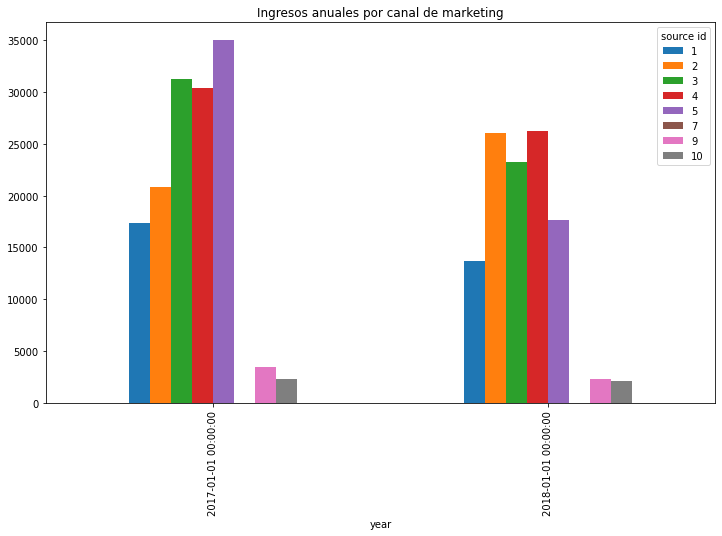

In [76]:
#Ingresos por canal de marketing en el 2017 y 2018
orders_pivot=orders_and_visits.pivot_table(index='year',values='revenue',columns='source id',aggfunc='sum').plot(kind='bar',figsize=(12,7),title='Ingresos anuales por canal de marketing')
plt.show()

* El orden de cual canal representa mayores ingresos para Y.Afisha es más evidente que en el 2017 los ingresos fueron superiores que el 2018, adicional que la fuente 5 fue la líder en el 2017, mientras que para el 2018 bajó considerablemente.

* El descenso del nivel de ingresos en el 2018 hace que el canal 4 y 2 esten muy a la par, mientras que en el 2017 el canal 4 se ubicó en 3 lugar.

* En el transcurso de estos año la fuente 2 tuvo un mejor nivel de ingresos siendo uno de los más altos en el 2018.

* Los canales 9 y 10 se evidencia que son los que menos contribuyen al ingreso de Y.Afisha por lo tanto debería anularse ese canal.




**5.¿Que canal de marketing es el preferido por los usuarios?**

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~También esta sección "** 5.¿Que canal de marketing es el preferido por los usuarios?**" es incorrecta, por la misma razón que te digo en la corrección anterior. Actualízala tras aplicar la corrección por favor!~~

<div class="alert alert-block alert-info">
<b>Ok.</b> <a class="tocSkip"></a>

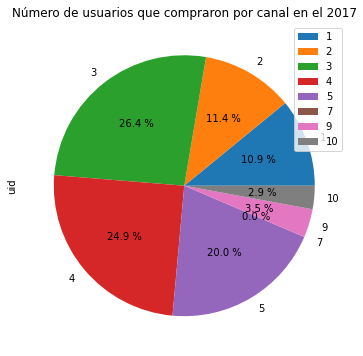

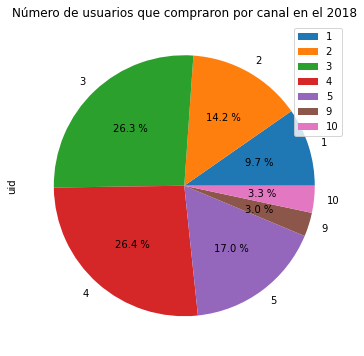

In [77]:
orders_users_per_source2017=orders_and_visits.query('year == "2017"').pivot_table(index='source id',values='uid',aggfunc='count').plot(kind='pie',y='uid',autopct='%0.1f %%',figsize=(11,6),title='Número de usuarios que compraron por canal en el 2017')
orders_users_per_source2018=orders_and_visits.query('year == "2018"').pivot_table(index='source id',values='uid',aggfunc='count').plot(kind='pie',y='uid',autopct='%0.1f %%',figsize=(11,6),title='Número de usuarios que compraron por canal en el 2018')

* El canal de marketing preferido por los usuarios es muy similar la distribución en el gráfico de pastel tanto para el 2017 como el 2018.
* Vemos que el canal 7 en el 2017 era muy poco la preferencia y ya para el 2018 desapareció, por lo que podemos confirmar que debió ser un canal muy antiguo. 
* Más del 70% de los usuarios ingresaron y compraron por los canales 4,3 y5 siendo los más populares, preferidos por los usuarios y los más efectivos para el negocio en rentabilidad.



**6 ¿Cuánto dinero traen? (LTV)**

Para calcular el LTV primero llamaremos al método describe de las columnas de fechas para el dataframe de orders y costos.

In [78]:
orders['buy_ts'].describe()

/tmp/ipykernel_52/1440822320.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['buy_ts'].describe()


count                   50414
unique                     12
top       2017-12-01 00:00:00
freq                     6218
first     2017-06-01 00:00:00
last      2018-05-01 00:00:00
Name: buy_ts, dtype: object

In [79]:
costos['dt'].describe()

/tmp/ipykernel_52/296893055.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  costos['dt'].describe()


count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

Los rangos de fechas de inicio como finalización coinciden. 
Haremos cohortes mensuales y capturaremos los meses a partir de las fechas  en la tabla de orders y costos.

In [80]:
costos['cost_month']=costos['dt'].astype('datetime64[M]')
orders['month']=orders['buy_ts'].astype('datetime64[M]')

Ahora recuperemos el mes de la primera compra de cada cliente:

In [81]:
first_orders1 = orders.groupby('uid').agg({'month': 'min'}).reset_index()
first_orders1.columns = ['uid', 'first_order_month']
first_orders1.head() 

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Calcularemos el número de nuevos clientes (n_buyers) para cada mes:

In [82]:
cohort_sizes=first_orders1.groupby('first_order_month').agg({'uid':'nunique'}).reset_index().rename(columns={'uid': 'n_buyers'})
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Continuando vamos a agregar los meses de la primera compra de los clientes y clientas a la tabla de pedidos:

In [83]:
orders_=pd.merge(orders_and_visits,first_orders1,on='uid')
orders_['month']=orders_['buy_ts'].astype('datetime64[M]')
orders_.head()

,buy_ts,revenue,uid,month,year,source id,first_order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-01-01,1,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-01-01,2,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-01-01,2,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-01-01,2,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-01-01,3,2017-06-01


Ahora vamos a agrupar la tabla de pedidos por mes de la primera compra y mes de la compra y totalizar los ingresos. Vamos a establecer el índice por defecto usando el método reset_index().

In [84]:
cohorts=orders_.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


La fila de la tabla anterior especifica los ingresos que generó la cohorte. 
Es decir, en la fila 0 podemos ver que los clientes que realizaron su primer pedido en junio del 2017 generaron un ingreso total de 9.557 dólares.
A efectos del análisis de cohortes, el LTV es el ingreso acumulado de una cohorte, que representa la cantidad de personas en la cohorte, por lo que se agregará en la tabla cuántos usuarios realizaron sus primeras compras en cada mes.

In [85]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head() 

,first_order_month,n_buyers,month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Los primeros cinco valores de esta columna son iguales, ya que todos se refieren a la misma cohorte de Junio del 2017 en las primeras 5 filas que se imprimieron.
 Finalmente el LTV es un parámetro relativo así que hagamos que las columnas muestren la edad de la cohorte en lugar del mes del pedido.



<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~En este caso tu columna revenue ya la puedes considerar directamente como el gp. En otras palabras, `report['gp'] = report['Revenue']`~~ </div>

<div class="alert alert-block alert-info">
<b>Ok.</b> <a class="tocSkip"></a>

In [86]:
report['age'] = (
    report['month'] - report['first_order_month']
) / np.timedelta64(1, 'M')

report['age'] = report['age'].round().astype('int')

report.head() 

,first_order_month,n_buyers,month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


Para terminar, se divide el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte. Visualizaremos las cohortes como una tabla dinámica para aclarar los datos a través de un mapa de calor.


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy bien! hasta este punto todo bien :)    
</div>

In [87]:
report['ltv'] = report['revenue'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis=1).round(2)

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Arriba tenemos algunos detalles. Hay que redondear hasta 2 decimales para no capar la información, y hay que considerar LTV como una suma acumulativa, así es más ilustrativa.~~

~~Es decir, hay que tener esto así:~~
    
`output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis=1).round(2)`
</div>

<div class="alert alert-block alert-info">
<b>Ok, gracias por la ayuda</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Éxito v2</b> <a class="tocSkip"></a>

No hay de qué! gracias a ti por tu esfuerzo :)    
</div>

Realizaremos el promedio para la primera cohorte.

In [88]:
ltv_201706 = output.loc['2017-06-01'].mean()
ltv_201706

8.53

El LTV de la cohorte de Junio del 2017 nos indica un promedio durante su ciclo de vida de 12 meses fue de 8.53 dólares

A continuación ilutraremos los valores de LTC por cohorte en un gráfico de calor.

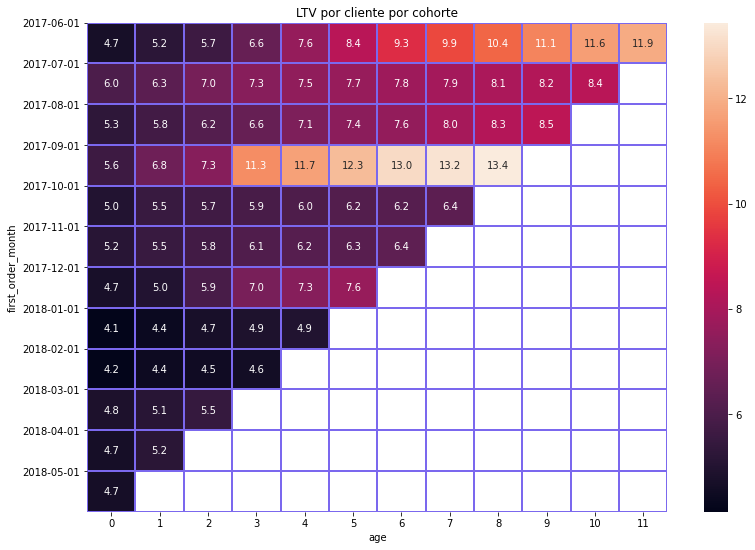

In [89]:
plt.figure(figsize=(13, 9))
plt.title('LTV por cliente por cohorte')
sns.heatmap(
 output,
 annot=True,
 fmt='.1f',
 linewidth=1,
 linecolor='mediumslateblue'
)

plt.yticks(list(range(0,12)),output.index.astype('str'))
plt.show()

* La cohorte de septiembre del 2017 es la que mayores LTV registra durante los meses que hizo su primera compra, en especial a partir del 7 mes.
* De igual manera la cohorte de septiembre del 2017 a partir del 4 mes incrementa consecutivamente hasta el valo máximo de 13.4 dólares.
* Para todas las cohortes a medida que pasan los meses el LTV va aumentando hasta alcanzar su máximo valor.

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Hay que actualizar los comentarios~~</div>

<div class="alert alert-block alert-info">
<b>Ok.</b> <a class="tocSkip"></a>

Ahora queremos saber cuánto fue el CAC para la cohorte de junio del 2017.

In [90]:
cohort_201706 = report[report['first_order_month'] == '2017-06-01']
costos_201706 = costos[costos['cost_month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costos_201706 / n_buyers_201706
ltv_201706 = output.loc['2017-06-01'].sum()

print('CAC:', cac_201706)
print('LTV:', ltv_201706)

CAC: 8.905091448344043
LTV: 102.36


* Adquirir cada cliente le costó a Y.Afisha a un promedio de 8.90 dólares mientras el LTV generó 102 dólares. Por lo tanto, la inversión en la adquisición de clientes valió la pena e incluso generó grandes beneficios ya que el LTV es mayor al CAC.

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Incorrecto también!! no podrías agregar la columna device de esa forma. De hecho, no podrías agregarla de ninguna forma. es imposible, pues no se relaciona en nada device con la tabla report. Por favor elimina esta sección 7~~</div>

<div class="alert alert-block alert-info">
<b>Ok,eliminado</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Misma corrección que la anterior. Elimina esta sección por favor ya que no tiene sentido :) Para hacerla correctamente habría que hacer otro proceso distinto desde cero~~.</div>

<div class="alert alert-block alert-info">
<b>Ok,eliminado</b> <a class="tocSkip"></a>

# 3.3 Métricas de marketing

**1. ¿Cuánto dinero total se gastó?**

In [91]:
costos.head()

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [92]:
costos['costs'].sum()

329131.62

* El total de gastos de marketing del 2017 y 2018 fueron 329.131,62 dólares.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Bien hecho!    
</div>

**2 ¿Cuánto dinero se gastó a lo largo del tiempo?**

               costs
cost_month          
2017-12-01  38315.35
2017-11-01  37907.88
2017-10-01  36322.88
2018-01-01  33518.52
2018-02-01  32723.03
2018-03-01  30415.27
2017-09-01  24368.91
2018-04-01  22289.38
2018-05-01  22224.27
2017-07-01  18240.59
2017-06-01  18015.00
2017-08-01  14790.54


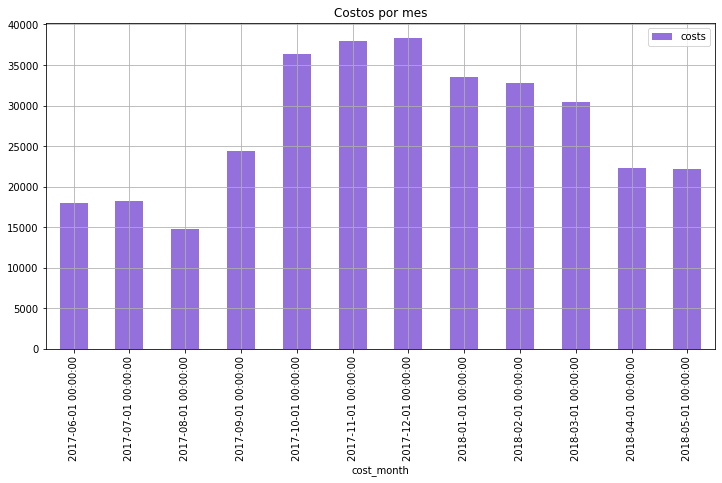

In [93]:
costos_meses=costos.pivot_table(index='cost_month',values='costs',aggfunc='sum')
print(costos_meses.sort_values(by='costs',ascending=False))
costos_meses.plot(kind='bar',title='Costos por mes',color='mediumpurple',figsize=(12,6), grid=True)
plt.show()

* El total de gastos por marketing se ha reducido desde el 2018 en adelante, por lo que explica porque los ingresos fueron menores como lo vimos anteriormente y por canal de marketing tambíén. 

* El 2017 fue el año que mas ingresos se registraron y es porque si aumentan los gastos de marketing se obtuvieron mayores visitas y por ende más compras.


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcta gráfica y muy buenas observaciones :)</div>

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Podrías incluso hacer una gráfica en la que tengas, en la misma figura, los gastos totales por mes y los ingresos totales por mes, para ver su relación de mejor forma. Sólo que cambiarías de tipo de gráfica, que no fuera de barras :)</div>

**3 ¿Cuánto dinero se gastó por fuente?**

source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


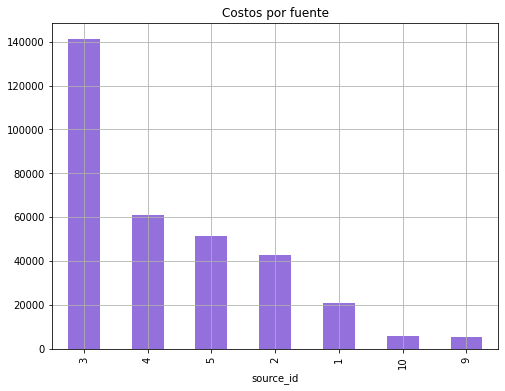

In [94]:
total_costos_by_source = costos.groupby('source_id')['costs'].sum().sort_values(ascending=False)
total_costos_by_source.plot(kind='bar', figsize=(8, 6), grid=True,
color='mediumpurple',title='Costos por fuente')
print(total_costos_by_source)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcto esto también!    
</div>

* Por canal de marketing se gastó más en el 3 con 141 mil dólares y los ingresos vimos que fue de 54 mil, es decir que se tiene grandes pérdidas por esta fuente.

* Comprobamos que el canal 4 fue el que generó mayores ingresos con 56 mil pero sus costos son de 61 mil, eso nos dice que tampoco se obtuvo retorno en este canal que aparentemente fue el más preferido por los usuarios y el de mayore ingresos.

* De igual manera vemos que la fuente 6,7 y 8 no se gastaron por ese canal y por ende fueron las que registraron ingresos mínimos de 5 mil o nulos.

* El canal 2 ocupó el ranking número cuatro en las ventas con 46 mil y sus costos fueron de 42 mil, por lo tanto vemos un retorno positivo al igual que el canal 1 y 5.


<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Recordatorio de que tal vez debas actualizar nuevamente los comentarios de arriba tras aplicar las correcciones :)~~

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Corrige los comentarios de arriba de ser necesario~~</div>

<div class="alert alert-block alert-info">
<b>Ok</b> <a class="tocSkip"></a>

**4.¿Cuánto costó la adquisición de clientes de cada una de las fuentes?**

Para saber el costo de adquisión de cada cliente por cada fuente realizaremos un merge de la agrupación de los costos totales por mes con la tabla del report para divirlo por la cantidad de clientes  en cada cohorte. 

In [95]:
costos['month']=costos['cost_month'].astype('datetime64[M]')

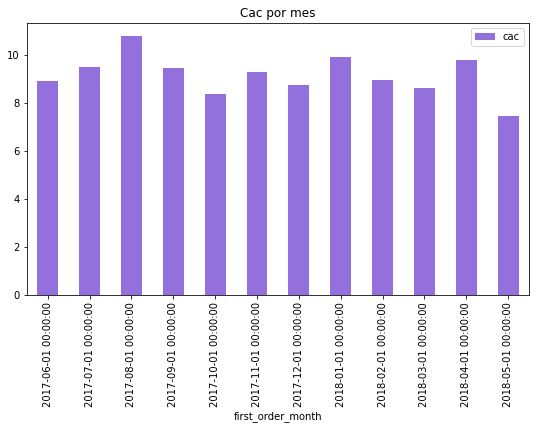

In [96]:
monthly_costs=costos.groupby('month').sum()
monthly_costs1=monthly_costs['costs']

report_=pd.merge(report,monthly_costs1,left_on='first_order_month',right_on='month')
report_['cac']=report_['costs'] /report_['n_buyers']

cac_general = report_.pivot_table(index='first_order_month', values='cac').plot(kind='bar',figsize=(9,5),title='Cac por mes',color='mediumpurple')

* De manera general vemos que el cac por mes se encuentra en un rango de 7 a 12 dólares durante el periodo de 2017 y 2018.
* El cac más alto fue en agosto del 2017 con 12 dólares y el mínimo en mayo del 2018 con 7 dolares, este descenso se puede dar porque el número de compradores fue menor a partir del 2018 en adelante.

<div class="alert alert-block alert-success">
<b>Éxito v2</b> <a class="tocSkip"></a>

Bien hecho!    
</div>

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcta creación del dataframe `report_` y de la columna `'cac'` :)    
</div>

Ahora para analizar por el cac por cada una de las fuentes, crearemos otro dataframe que viene de la agrupación de source id, first order month y el número de usuarios únicos.

In [97]:
cohorts_source = orders_.groupby(['source id', 'first_order_month']).agg({'uid': 'nunique'}).reset_index()
cohorts_source.rename(columns={'uid': 'n_buyers','source id':'source_id'}, inplace=True)
cohorts_source.head()

,source_id,first_order_month,n_buyers
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340


Necesitamos saber cual es el costo por fuente y por mes.

In [98]:
costos_0=costos.groupby(['source_id','month']).agg({'costs':'sum'}).reset_index()
costos_0.head()

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


<div class="alert alert-block alert-danger">
<b>A resolver v2</b> <a class="tocSkip"></a>

~~Correcto! Sólo necesitas resetear el índice arriba para más facilidad de trabajo posteriormente :)~~
    
~~`costos_0=costos.groupby(['source_id','month']).agg({'costs':'sum'}).reset_index()`~~    
</div>

<div class="alert alert-block alert-info">
<b>Ok,gracias</b> <a class="tocSkip"></a>

Una vez que tenemos las 2 tablas realizaremos el merge entre ellas tanto en el source como en el mes para poder calcular el cac por canal y por cohorte y lo graficaremos para visualizar como ha variado en el tiempo.

In [99]:
cac_per_source2=cohorts_source.merge(costos_0,left_on=['source_id','first_order_month'],right_on=['source_id','month'])
cac_per_source2['cac2']=cac_per_source2['costs'] /cac_per_source2['n_buyers']
cac_per_source2=cac_per_source2.drop(['month'],axis=1)
cac_per_source2.head()

,source_id,first_order_month,n_buyers,costs,cac2
0,1,2017-06-01,190,1125.61,5.924263
1,1,2017-07-01,160,1072.88,6.705500
2,1,2017-08-01,113,951.81,8.423097
3,1,2017-09-01,227,1502.01,6.616784
4,1,2017-10-01,340,2315.75,6.811029


<div class="alert alert-block alert-danger">

<b>A resolver v3</b> <a class="tocSkip"></a>

~~Lo siento Sara! olvidé señalar que, después de hacer el merge, debes eliminar la columna `month` en `cac_per_source2`, ya que al final de cuentas es idéntica a la columna `first_order_month` :)~~</div>

<div class="alert alert-block alert-info">
<b>Ok,gracias</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Aquí arriba hay que hacer el merge tanto en el source como en el mes, y sin especificar el `how=` (porque el default es `how='inner'`):~~
    
~~`cac_per_source2=cohorts_source.merge(costos_0,left_on=['source_id','first_order_month'],right_on=['source_id','month'])` ~~   
 

<div class="alert alert-block alert-info">
<b>Ok,gracias</b> <a class="tocSkip"></a>

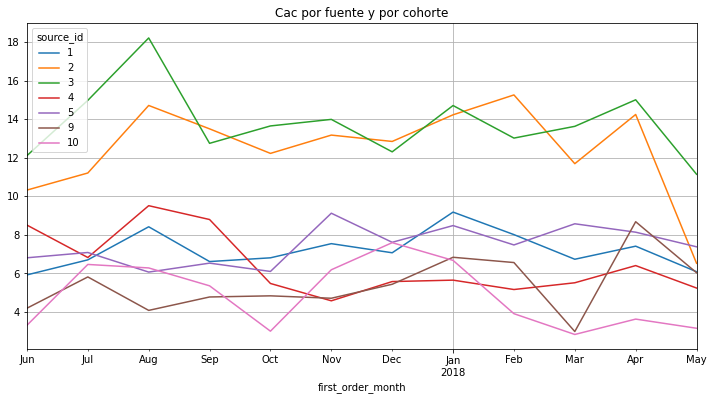

In [100]:
#Gráfico de cac por fuente y por cohorte
l=cac_per_source2.pivot_table(index='first_order_month',values='cac2',columns='source_id').plot(style='-',figsize=(12,6),title='Cac por fuente y por cohorte',grid=True)

<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Quizá cambie la gráfica y promedio después de las correcciones, para que actualices comentarios :)~~

<div class="alert alert-block alert-info">
<b>Ok,gracias si cambió el grafico :)</b> <a class="tocSkip"></a>

In [101]:
cac_per_source2['cac2'].mean().round(2)

8.24

* El promedio del cac por canal durante el 2017 y el 2018 fue de 8.24 dólares. 

* Como vimos anteriormente, el canal 3 fue el que más gastos obtuvo por lo que en el mes de agosto alcanza un pico de 18 dólares y de manera general vemos que es el mas alto a lo largo del periodo si lo comparamos con los demás. 

* Por otro lado el canal 4 observamos que a partir de octubre del 2017 en adelante se encuentra el cac en 5 dólares aproximadamente, dado que vimos anteriormente que el ingreso por este canal bajó en el 2018. 

* La fuente 9 era de las que menos gastos se incurrió pero su número de usuarios fue mucho mas bajo en relación por lo tanto en el gráfico indica que el costo de adquisición por usuario es entre 2 y 8 dólares y ni siquiera es uno de los mas preferidos y sus ingresos por este canal son bajos.

* En el canal 2 analizamos que hubo una rentabilidad entre gastos e ingresos, sin embargo es el segundo canal con el cac más alto durante todo el periodo de los 2 años, superando el valor promedio. 

<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Te había comentado que actualizaras una gráfica que sí habías hecho correctamente en la que comparabas los promedios del CAC para cada source, pero parece que la borraste. **Faltaría agregar dicha gráfica de barras**. Se haría a partir de una tabla como ésta:~~
    
~~`cac_per_source2.groupby('source_id').agg({'cac2': 'mean'}).round(2)` ~~   

<div class="alert alert-block alert-info">
<b>Ok,gracias</b> <a class="tocSkip"></a>

A continuación realizaremos una gráfica en barras para observar la media del cac por fuente entre los 2 años.

<AxesSubplot:title={'center':'Cac por canal de marketing'}, xlabel='source_id'>

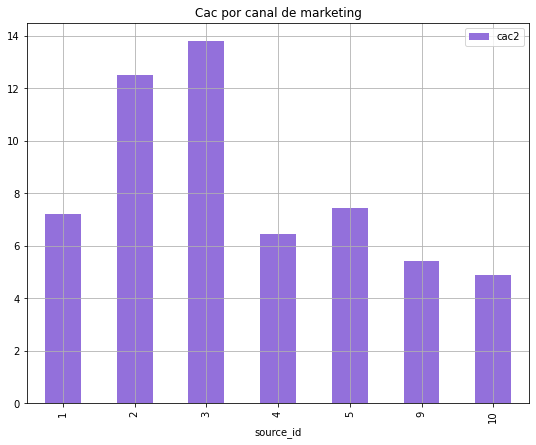

In [102]:
cac_per_source2.groupby('source_id').agg({'cac2': 'mean'}).round(2).plot(kind='bar',title='Cac por canal de marketing',color='mediumpurple',grid=True,figsize=(9,7))

* El cac por la fuente 3 y 2 son los más altos, dado que sus gastos fueron mayores en comparación al número de usuarios que ingresaron por esa fuente.
* El cac parala fuente 4 es uno de los más bajos y es porque hubo un mayor número de usuarios que usaron ese medio para comprar comparado con los gastos que tuvieron que incurrir.
* No existe mucha diferencia entre el cac 4, 9 y 10, sin embargo estos 2 ultimos fueron los últimos dentro de la preferencia de los compradores como en el nive de ingresos.

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Bueno, fuera de eso, **el resto de esta sección es incorrecto**, por lo que te digo en correcciones pasadas. En esta sección:~~
    
* ~~Puedes empezar por graficar el cac general vs. el mes de la cohorte. Para eso, puedes simplemente hacer una tabla a partir de `report_`:~~

~~`cac_general = report_.pivot_table(index='first_order_month', values='cac').reset_index()`~~

* ~~El análisis posterior del cac por fuente ya requiere de más trabajo. En la sección "*4.-¿Cuál es el canal de marketing más efectivo?*" ya te hice la corrección de cómo agregar la columna source correctamente al dataframe `orders`, con lo que también ya debe estar la columna correcta `source` en el dataframe `orders_`. Debes trabajar a partir de tu dataframe `orders_`, agrupando no sólo por fecha de primera compra, sino por fuente (`source`):~~
   
`cohorts_source = orders_.groupby(['source', 'first_order_month']).agg({'Uid': 'nunique'}).reset_index()
cohorts_source.rename(columns={'Uid': 'n_buyers'}, inplace=True)`
    
~~Luego, a partir de `costos` debes calcular los **costos por mes por fuente**, creando una nueva tabla. Esta nueva tabla la unirás con `cohorts_source` con un `.merge()`. Finalmente calcularás el cac en una nueva columna de este dataframe final. Con estos nuevos datos, actualizarás la gráfica que tienes ("Cac por canal"), ya que es una buena forma de visualizar los promedios generales del CAC por fuente.~~ 
    
* ~~Al final agrega una gráfica o gráficas de la evolución del CAC a lo largo del mes para cada fuente. Es decir, algo así:~~
    
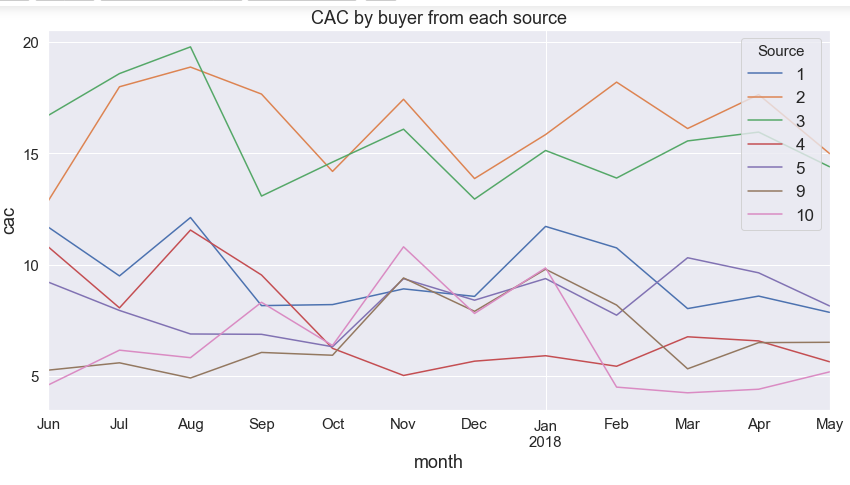    
    
* ~~Tu gráfica "Cac por canal y por fuente" no la puedes mantener por lo que te digo en correcciones pasadas :)~~
    

~~**NO OLVIDES AGREGAR TUS COMENTARIOS DE CADA GRÁFICA**~~    
    

<div class="alert alert-block alert-info">
<b>Ok con este punto</b> <a class="tocSkip"></a>

**6. ¿Cuán rentables eran las inversiones?**

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Ok, buenos cálculos en general en esta sección, Sara! :) sólo faltan cosas que te digo más abajo    
</div>

Encontraremos el ROMI, que es el retorno de la inversión en marketing dividiendo el LTV por CAC de manera general y por canal.

In [103]:
report_.head()

,first_order_month,n_buyers,month,revenue,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0,8.905091


<div class="alert alert-block alert-danger">

<b>A resolver v3</b> <a class="tocSkip"></a>

~~Ok, Sara, buena idea para crear tus tablas ROMI de cada source! pero está mal ejecutada, porque recuerda que la tabla `report_` fue creada sin tomar en cuenta las sources, por lo que no la puedes unir con tu tabla `cac_per_source2`. Los pasos para crear correctamente tus tablas son los siguientes:~~

* ~~Primero, la información que nos falta son **los ingresos obtenidos mensualmente por cada cohorte, para cada source**. Para obtener esto, crea la siguiente tabla:~~
    
`revenue_monthly_source = orders_.groupby(['source id','first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
revenue_monthly_source = revenue_monthly_source.rename(columns = {'source id':'source_id'})`
    
* ~~Ahora sí, esta tabla `revenue_monthly_source` sí la podemos unir con `cac_per_source2`:~~
    
`report_source_ = cac_per_source2.merge(revenue_monthly_source,
                                     on=['source_id','first_order_month'])`
    
* ~~En tu nueva tabla `report_source_`, crea las columnas `'age'`, `'ltv'` y `'romi'`.~~
    
* ~~Finalmente, **crearás un bucle** que cree las tablas ROMI (**en forma de mapas de calor**) para cada source, a partir de la tabla `report_source_`. Yo te pongo el ejemplo de cómo se crearía la tabla ROMI para la source número 1:~~
    
`report1 = report_source_.query('source_id==1')
romi1 = report1.pivot_table(index='first_order_month',columns='age',values='romi',aggfunc='mean').cumsum(axis=1)
romi1.round(2).fillna('')`
    
~~**RECUERDA QUE DEBES USAR UN BUCLE, PARA MÁS PRACTICIDAD, Y QUE DEBES DE MOSTRAR MAPAS DE CALOR.**~~
</div>

<div class="alert alert-block alert-info">
<b>ok,gracias</b> <a class="tocSkip"></a>

In [104]:
# Obtendremos la tabla con los ingresos obtenidos mensualmente para cada cohorte y para cada fuente de marketing

revenue_monthly_source = orders_.groupby(['source id','first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
revenue_monthly_source = revenue_monthly_source.rename(columns = {'source id':'source_id'})

# Realizaremos un merge
report_source_= cac_per_source2.merge(revenue_monthly_source,on=['source_id','first_order_month'])
report_source_['age']= (report_source_['month'] - report_source_['first_order_month']) / np.timedelta64 (1, 'M')

# Creamos la columna age
report_source_['age'] = report_source_['age'].round().astype('int')

# Creamos la columna ltv 
report_source_['ltv'] = report_source_['revenue'] / report_source_['n_buyers']

# Calculamos el romi
report_source_['romi']= report_source_['ltv'] / report_source_['cac2']

#Imprimos las primeras 5 filas del nuevo dataframe
report_source_.head()


,source_id,first_order_month,n_buyers,costs,cac2,month,revenue,age,ltv,romi
0,1,2017-06-01,190,1125.61,5.924263,2017-06-01,1378.70,0,7.256316,1.224847
1,1,2017-06-01,190,1125.61,5.924263,2017-07-01,414.98,1,2.184105,0.368671
2,1,2017-06-01,190,1125.61,5.924263,2017-08-01,419.43,2,2.207526,0.372625
3,1,2017-06-01,190,1125.61,5.924263,2017-09-01,714.24,3,3.759158,0.634536
4,1,2017-06-01,190,1125.61,5.924263,2017-10-01,811.20,4,4.269474,0.720676


In [105]:
#Sacaremos tal tabla con el Romi General para cada cohorte
romi_general=report_source_.pivot_table(index='first_order_month',columns='age',values='romi',aggfunc='mean')
romi_general.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.697392,0.08788,0.106755,0.19557,0.198908,0.129165,0.171511,0.119134,0.107946,0.103138,0.088087,0.070739
2017-07-01,0.729662,0.047845,0.165981,0.061628,0.042881,0.031743,0.027248,0.024947,0.034888,0.031845,0.0335,
2017-08-01,0.673658,0.060327,0.072594,0.056529,0.062292,0.037104,0.033019,0.071228,0.055958,0.0292,,
2017-09-01,0.680647,0.171725,0.074049,0.417927,0.054585,0.076433,0.097113,0.044285,0.049099,,,
2017-10-01,0.773211,0.084552,0.034297,0.025105,0.025049,0.027528,0.012325,0.018097,,,,
2017-11-01,0.713794,0.050461,0.034142,0.053117,0.022232,0.007962,0.013917,,,,,
2017-12-01,0.611502,0.040597,0.139711,0.163335,0.043799,0.045578,,,,,,
2018-01-01,0.467566,0.030759,0.035239,0.025114,0.007327,,,,,,,
2018-02-01,0.566343,0.040079,0.008845,0.01449,,,,,,,,


* Podemos observar que el Romi es alto con un valor por encima del 0.50 en cada cohorte pero solo en el mes 0, esta tabla nos confirma que la rentabilidad es mayor en ese mes.
* Existe una gran reduccion para el mes 1 en adelante para cada cohorte.


Finalmente nos interesa concoer el Romi por cada fuente de marketing en cada una de las cohortes.

In [106]:
# Crearemos una variable para almacenar la lista de las fuentes unicas 
unique_sources=report_source_['source_id'].unique().tolist()
unique_sources

[1, 2, 3, 4, 5, 9, 10]

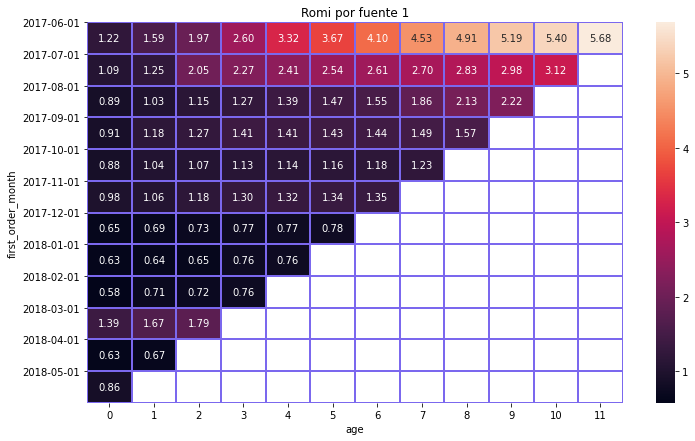

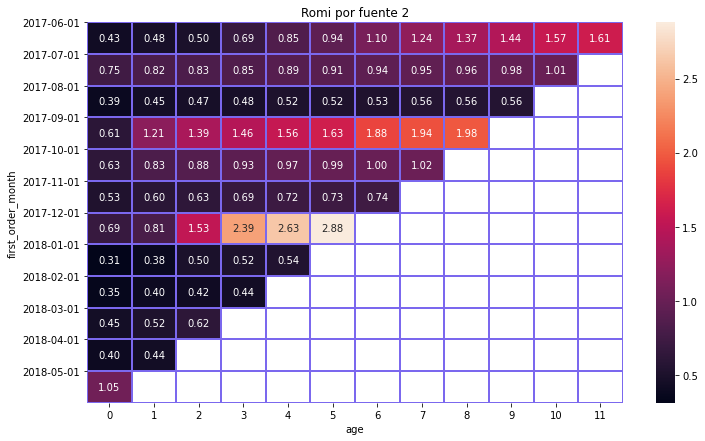

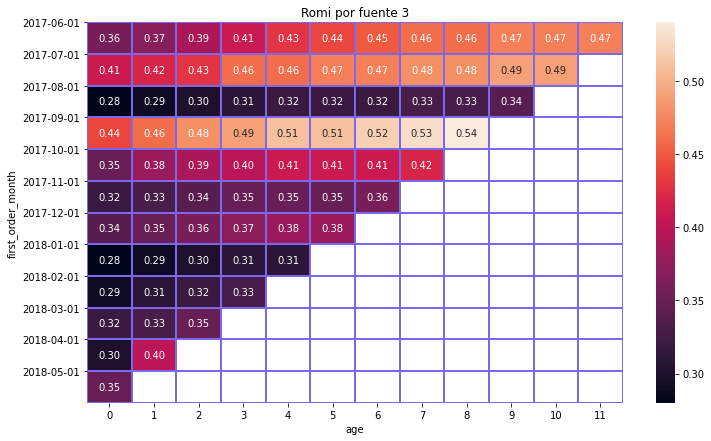

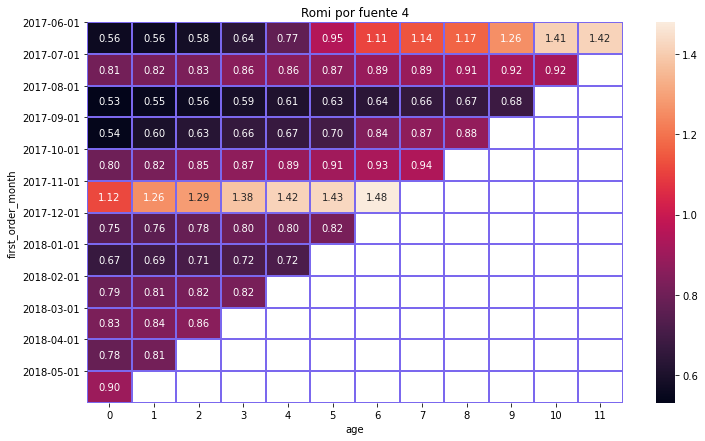

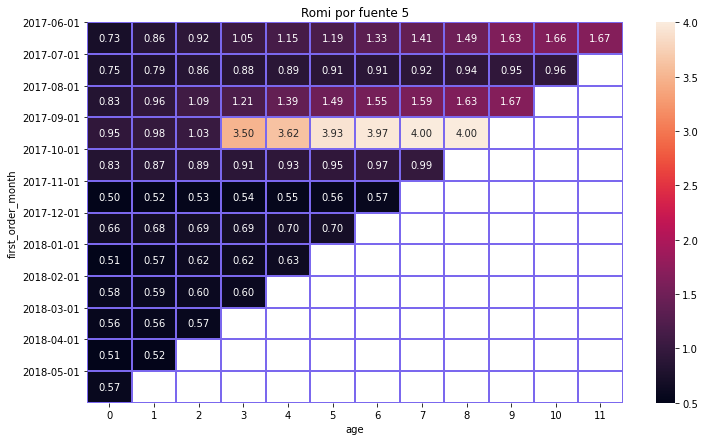

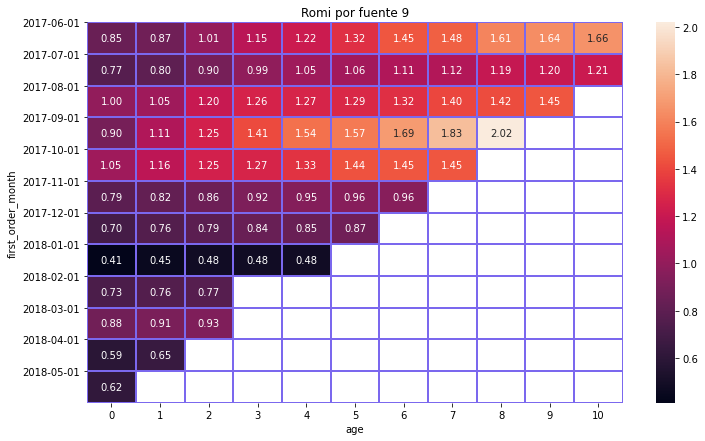

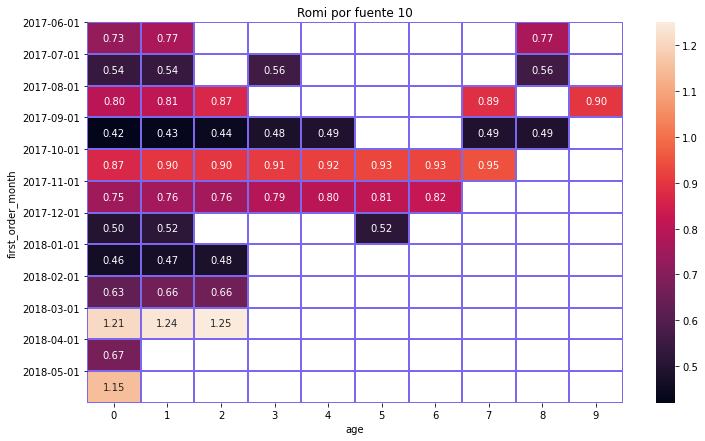

In [107]:
# Realizaremos un bucle para conocer por cada fuente de marketing el romi 

for source in unique_sources:
    data_filtered=report_source_[report_source_['source_id']==source]
    pivot=data_filtered.pivot_table(index='first_order_month',columns='age',values='romi',aggfunc='mean').cumsum(axis=1)
    
    pivot=pivot.round(2)#.fillna('')
    
    plt.figure(figsize=(12, 7))
    plt.title(f'Romi por fuente {source}')
    sns.heatmap(
     pivot,
     annot=True,
     fmt='.2f',
     linewidth=1,
     linecolor='mediumslateblue')

    plt.yticks(list(range(0,12)),output.index.astype('str'))
    plt.show()
    

* De manera general observamos que el Romi por cada fuente de marketing fue mayor para la fuente 9, alcanzando un valor de 2.02 en el mes 9 para la cohorte de septiembre del 2019. Adicional que el romi va aumentando a medida que pasan los meses.

* El romi para la fuente 1 y es la unica que en la cohorte de junio del 2017 crece a medida que pasan los meses alcanzado un valor maximo de 5.68 en el ultimo mes.

* La fuente 10 vemos que no hay romi en todos los meses, existe solo hasta el mes 8 de manera seguido para la cohorte de octubre del 2017. Esto corresponde a que observamos que no era uno de los canales mas preferidos y usados por los clientes. 

* Anteriormente descubrimos que los canales por los cuales fueron mas usados para la visita al sitio web fueron las fuentes 3, 4 y 5, ahora analizando su romi individual observamos que su valor no es tan alto comparado con las otras fuentes, esto se puede deber a que tambien si representa una gran valor los gastos que se hacen en esas fuentes, comparado con la 9 que vimos que no tenian mucha inversion y por ende su romi es mayor.

<div class="alert alert-block alert-danger">

<b>A resolver v3</b> <a class="tocSkip"></a>

* ~~Cuando hagas tus nuevos mapas de calor, usa la opción `fmt='.2f'`, para ver al menos 2 decimales :)~~

* ~~No olvides mostrar las tablas ROMI de todas las sources, te faltó mostrar las ROMI de algunas sources. Muestra de todas las sources **excepto de la source 7**. ¿Por qué? Para saberlo, revisa a cuántos usuarios les corresponde la source 7 :)~~
</div>

<div class="alert alert-block alert-info">
<b>ok,gracias</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

* ~~Buena tabla, Sara! sólo por favor muéstrala en forma de tabla de calor :)~~

* ~~Aquí tú tienes el cálculo de la tabla de ROMI general, sólo que se espera que obtengas también las **tablas de ROMI para cada una de las sources**. Esto se puede hacer de forma relativamente sencilla a partir de las tablas que obtendrás en la sección "*4.¿Cuánto costó la adquisición de clientes de cada una de las fuentes y dispositivo?*" y/o creando tablas nuevas de forma análoga a las que crearás en esa sección y las que haces en secciones anteriores :) **Me disculpo mucho por la falta de especificidad del brief, Sara, ya estamos trabajando en corregirlo.**~~
</div>

<div class="alert alert-block alert-info">
<b>ok(</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">

<b>A resolver v2</b> <a class="tocSkip"></a>

~~Lo siento Sara, creo que no se entendió bien la corrección. Tu método para hacer la tabla ROMI era correcto, el anterior, sólo que tú hiciste una ROMI general. De hecho, podías dejar esa ROMI, como te dije. Pero, **había que agregar también tablas ROMI para cada source**. Obtendrás varias gráficas bonitas como éstas, además de tu tabla ROMI general:~~
    
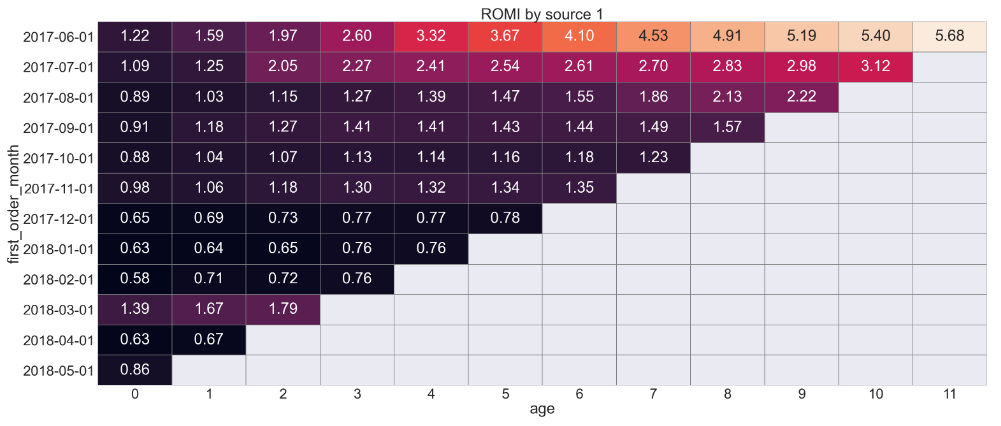

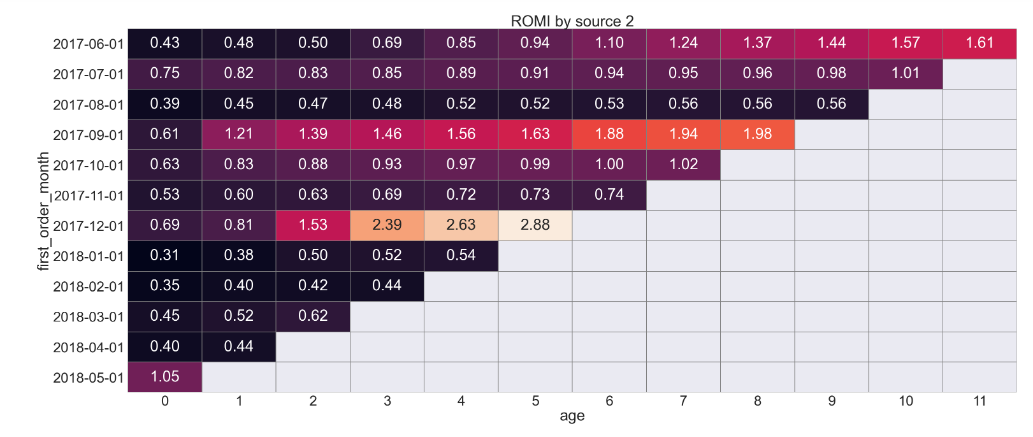
   
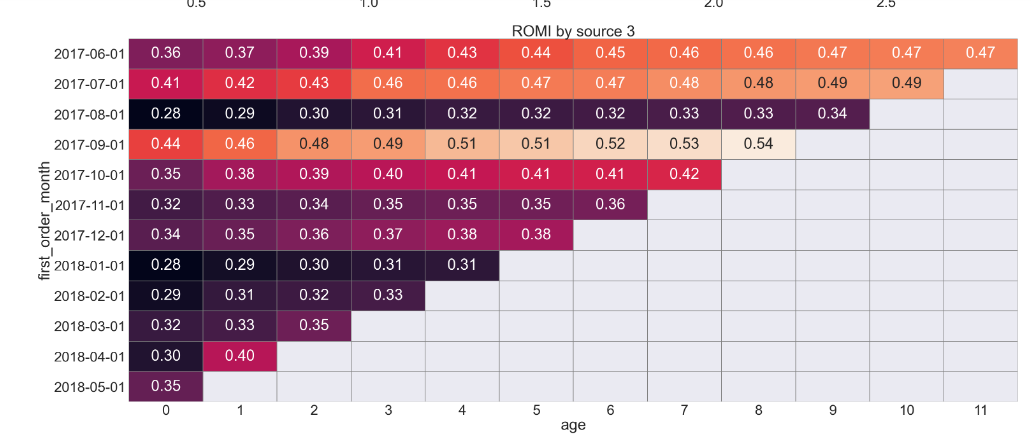
    
~~Y así sucesivamente. Espero que tengas una idea de cómo hacer las tablas ROMI para cada source, ya con lo hecho en las secciones previas y mis comentarios. Si no, puedes preguntarme, o a tu tutor :) Te dejo abajo tu código y tu tabla ROMI general que habías hecho en la iteración pasada, por si te sirve.~~

<div class="alert alert-block alert-info">
<b>Gracias, no me salieron los resultados iguales, pero intenté haciendo un merge del dataframe report_ con cac_per_source 2 para traer el unico dato que me falta que es el source_id. Pero no estoy segura si fue la manera correcta tomando en cuenta que me tocó repetir el mismo procedimiento para cada fuente utilizando el query para filtrar el canal. Si me podrías guiar como sacar el romi por fuente tomando en cuenta que sea una sola tabla consolidada haciendo el merge quiza a partir de otra tabla? y si se deba aplicar un bucle también, asi es como lo veo pero quedo atenta si tienes una mejor idea o corrección de la manera que lo intenté. No voy a poner conclusiones en ese punto dado que pueden ser errónea la interpretación</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">

<b>A resolver v3</b> <a class="tocSkip"></a>

~~Ok, Sara ya te dejé correcciones :) **No olvides agregar comentarios breves generales de tus tablas ROMI de las difentes sources** :)~~</div>

<div class="alert alert-block alert-info">
<b>ok</b> <a class="tocSkip"></a>

Finalmente nos interesa estudiar la cohorte promedio, para eso se promedia el ROMI de todas las cohortes para cada mes de ciclo de vida. 

In [108]:
output.cumsum(axis=0).mean(axis=1) 

first_order_month
2017-06-01     8.530000
2017-07-01    15.700000
2017-08-01    22.333000
2017-09-01    32.243333
2017-10-01    37.112500
2017-11-01    41.847143
2017-12-01    46.698333
2018-01-01    49.504000
2018-02-01    51.710000
2018-03-01    54.020000
2018-04-01    56.850000
2018-05-01    59.000000
dtype: float64

* En promedio, las cohortes compensan la inversión en marketing desde el ultimo mes del 2017 y su aumento es progresivo hasta que alcanza 6.48


# 4. Conclusión general

Finalmente después del análisis podemos llegar a las siguientes recomendaciones y conclusiones:
    
    
1. Las fuentes que principalmente recomiendo invertir es la 4.  Dado que la fuente 4 es la que generó mayor atractividad a los usuarios para realizar sus compras, adicional fue el canal que generó mayores ingresos entre el 2017 y el 2018 y sus gastos fueron entre los más bajos. 


2. Las plataformas que recomendaría para enfocar las próximas campañas de marketing sería a través de desktop, porque en la métrica de cual era la distribución del las visitas a la página web encontramos que un 80% visita por desktop y únicamente el 20% visita por movil por lo que se debería revisar con el equipo de diseño del sitio web en esta version para detectar si en la nagecación se distorciona el diseño o es más lento. 


3. Como hallazgos importantes encontramos en la empresa Y.Afisha: 
   * Tasa de retención: Como vimos anteriormente disminuyen la tasa a medida que pasan los meses por cada cohorte. Se debe emplear estraegias comerciales para incentivar su regreso y que sea mas frecuente durante el año.
   
   * Segmentación: La mayoría de los clientes desde que visitaron el sitio web hasta que realizaron su primera compra cayeron en A, se debe continuar con la promoción en ese grupo objetivo y que representa mayor potencial para el negocio ya que es su tiempo de conversión fue más rápido e investigar las características de los clientes que cayeron en B dado que su periodo de conversión fue mas de 1 mes y puede ser que son nuevos clientes y también buscan otras opciones en otras tiendas y les cuesta decidir su compra.
   
   * Ingreso promedio: En la comparación entre el 2017 y el 2018 vemos que no hubo variación y que en promedio el usuario gasta 5 dólares en cada compra dado que el ingreso promedio es bajo se debe compensar en el volumen de ventas totales que se obtenganLos ingresos desde el primer mes en junio del 2017 hasta junio del 2018  van decreciendo, no existe un mes en el que se venda más que el anterior esos son datos preocupantes que nos indican que han algun problema o fallo de estrategia comercial.
   
   * LTV,CAC,ROMI: El promedio del cac por canal durante el 2017 y el 2018 fue de 8 dólares. Como vimos anteriormente, el canal 3 fue el que más gastos obtuvo por lo que en el mes de agosto alcanza un pico de 18 dólares y de manera general vemos que es el mas alto a lo largo del periodo.  Observamos que para todas las cohortes a medida que pasan los meses el LTV va aumentando hasta alcanzar su máximo valor. Para la fuente 9 el romi es más alto en especial para las cohortes del 2018 en adelante, esto se debe a que el ltv era mayor porque vimos que el número de usuarios eran mínimos. A pesar que el canal 4 fue el que registro mayores ventas, nos dimos cuenta que en su romi por cada cohorte y en los meses no era muy alto su valor , lo mismo con lafuente 3  y 5. Esto se debe a que la inversion realizada en estas fuentes fue tambien alto y como consecuencia registro mayor acogida. 
  

<div class="alert alert-block alert-danger">

<b>A resolver v3</b> <a class="tocSkip"></a>

~~Actualiza tus conclusiones tras las correcciones por favor :)~~

<div class="alert alert-block alert-info">
<b>Gracias, he corregido todo, espero que ya este bien :)</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Éxito v4</b> <a class="tocSkip"></a>

Así es, felicidades!    
</div>